# 2. Filtering diad files into categories
- This workbook shows how to filter diad files into 3 categories, to allow easier fitting
- This data is from Devitre et al. (2021), collected from acqusitions on a high pressure optical cell on the Cornell WITec Alpha300R. 

## Downloading DiadFit locally
- The easiest way to install diad fit is by removing the #. It will install from PyPI
- You only need to do this once on each computer, or run in order to grab an updated version. 

In [107]:
#%pip install -e "C:\Users\charl\Documents\Python dev\DiadFit"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [1]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import DiadFit as pf
pf.__version__

'0.0.59'

## Get the folder to your files
- If this notebook is in the same folder as your files, you can use os. to get the file name. Else paste in the file name as DayFolder='C:/Penny' or whatever you use on your computer. 
- In this case, Spectra files are stored in one subfolder called 'Spectra', Metadata files in another subfolder called 'MetaData'

In [6]:
MasterFolder = r"C:\Users\charl\Documents\Instruments and calibrations"
DayFolder = os.path.join(MasterFolder, "UCB_4-10-23")

meta_path=DayFolder +  '\Metadata'
spectra_path=DayFolder + '\Spectra'

if not os.path.exists(MasterFolder + '\OUTPUT'):
    os.mkdir(MasterFolder +'\OUTPUT')

## This function finds all files in your path with the specified file format
- Specify information about your file formats here, as well as any text in filenames that you dont want to fit. 

In [7]:
filetype='headless_txt' # Specifies raman file format, here a text file with no header
file_ext='.txt' # File extension, a txt file
prefix=False # File doesn't have a 01, 02 prefix, as WItec can add
exclude_str=['Ne', 'NE','neon', 'Si', 'nodiad', 'Spectrum', 'CRR','series','de'] # Exclude files with these strings in

Diad_Files=pf.get_files(path=spectra_path, file_ext=file_ext, exclude_str=exclude_str)
print(Diad_Files)

['003 FDCA-P1-1.txt', '005 FDCA-P1-2.txt', '007 FDCA-P1-3.txt', '009 FDCA-P2-1.txt', '011 FDCA-P2-2.txt', '013 FDCA-P2-3.txt', '015 FDCA-P3-1.txt', '017 FDCA-P3-2.txt', '019 FDCA-P3-3.txt', '022 FDCA-P4-1.txt', '024 FDCA-P4-2.txt', '026 FDCA-P4-3.txt', '028 FDCA-P5-1.txt', '030 FDCA-P5-2.txt', '032 FDCA-P5-3.txt', '034 FDCA-P6-1.txt', '036 FDCA-P6-2.txt', '038 FDCA-P6-3.txt', '040 FDCA-P7-1.txt', '042 FDCA-P7-2.txt', '044 FDCA-P7-3.txt', '049 FDCA-P8-1.txt', '051 FDCA-P8-2.txt', '053 FDCA-P8-3.txt', '055 FDCA-P9-1.txt', '057 FDCA-P9-2.txt', '059 FDCA-P9-3.txt', '061 FDCA-P10-1.txt', '063 FDCA-P10-2.txt', '065 FDCA-P10-3.txt', '067 FDCA-P11-1.txt', '069 FDCA-P12-1.txt', '071 FDCA-P13-1.txt', '073 FDCA-P14-1.txt', '075 FDCA-P14-2.txt', '076 FDCA-P14-3.txt', '078 FDCA-P15-1.txt', '080 FDCA-P16-1.txt', '082 FDCA-P17-1.txt', '084 FDCA-P18-1.txt', '085 FDCA-P18-2.txt', '087 FDCA-P19-1.txt', '088 FDCA-P19-2.txt', '089 FDCA-P19-3.txt', '091 FDCA-P20-1.txt', '093 FDCA-P21-1.txt', '095 FDCA-P22-

## Find approximate peak positions
- Tweak Scipy parameters to find the diad peaks
- Tweak these parameters to make sure Scipy 'find_peaks' gets your diad peaks for your instrument.
- Prominence: most useful parameter, required prominence of peaks
- height: Minimum height of peaks, not that useful with various background positions
- distance: Used to help with peaks that are very close to one another, smaller distance, remove peaks until keep set distance apart
- width: Minimum width of peaks

In [8]:
# Tweak parameters away from the default here
diad_id_config=pf.diad_id_config(prominence=12, width=1)
diad_id_config

diad_id_config(height=1, width=1, prominence=12, plot_figure=True, exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1290), Diad2_window=(1349, 1425), Diad1_window=(1245, 1320), approx_diad2_pos_3peaks=(1379, 1395, 1362))

filename  approx_split    Diad1_pos    Diad2_pos      HB1_pos  \
8  069 FDCA-P12-1.txt    105.053674  1281.482103  1386.535777  1261.320509   

       HB2_pos     C13_pos  Diad1_abs_prom  Diad2_abs_prom  HB1_abs_prom  ...  \
8  1408.462747  1369.13499     5195.945387    10169.035476    252.595836  ...   

    HB2_height  C13_height  Diad1_height  HB1_height  Diad1_Median_Bck  \
8  1094.225199    955.7256   5909.845412  939.995861        713.900024   

   Diad2_Median_Bck  C13_HB2_abs_prom_ratio  Diad2_HB2_Valley_prom  \
8        716.450012                2.514309               1.162869   

   HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
8                  96.915902                 154.133816  

[1 rows x 39 columns]

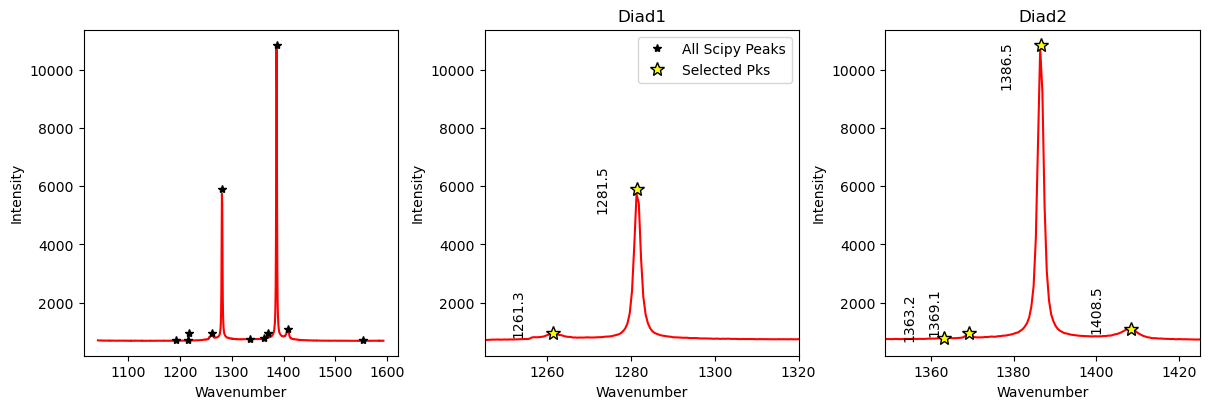

In [9]:
# Check it has found the peaks of interest. Here we are looking at the 1st file
filetype='headless_txt'
df_peaks, Diad, fig=pf.identify_diad_peaks(
config=diad_id_config, 
path=spectra_path, filename=Diad_Files[31],
filetype=filetype, plot_figure=True)
df_peaks

### Now you have looked at a few files and are happy with these parameters, loop over all files to get approximate fit parameters for all your diad acquisitions

In [10]:
fit_params, data_y_all=pf.loop_approx_diad_fits(spectra_path=spectra_path, config=diad_id_config, 
                       Diad_Files=Diad_Files, filetype=filetype, plot_figure=False)
fit_params.head()

100%|██████████| 156/156 [00:04<00:00, 34.68it/s]


filename  approx_split    Diad1_pos    Diad2_pos      HB1_pos  \
0  003 FDCA-P1-1.txt    105.570637  1280.778152  1386.348790  1260.512065   
1  005 FDCA-P1-2.txt    105.576137  1280.772653  1386.348790  1260.127092   
2  007 FDCA-P1-3.txt    105.576137  1280.767153  1386.343290  1260.550563   
3  009 FDCA-P2-1.txt    105.559638  1280.800151  1386.359789  1260.633057   
4  011 FDCA-P2-2.txt    105.559638  1280.800151  1386.359789  1260.297580   

       HB2_pos      C13_pos  Diad1_abs_prom  Diad2_abs_prom  HB1_abs_prom  \
0  1407.659803  1369.217484     4847.457414     9482.707955    220.610325   
1  1407.687301  1369.255982     5083.317217     9889.857815    220.225236   
2  1408.050276  1369.134990     4766.794313     9232.841715    210.575614   
3  1407.764296  1369.156989     4522.867575     8785.610192    203.612110   
4  1408.033777  1369.129490     4642.192380     9106.569275    213.713304   

   ...   HB2_height  C13_height  Diad1_height  HB1_height  Diad1_Median_Bck  \
0  ...  1040.431258  963.903522   5573.657426  919.010349        726.200012   
1  ...  1059.938968  972.331543   5808.817217  916.425249        725.500000   
2  ...  1044.114609  955.661146   5491.994325  906.975638        725.200012   
3  ...  1025.532018  941.036394   5244.367575  898.212086        721.500000   
4  ...  1038.608365  947.128186   5364.192380  908.113328        722.000000   

   Diad2_Median_Bck  C13_HB2_abs_prom_ratio  Diad2_HB2_Valley_prom  \
0        728.100006                2.253320               1.183347   
1        727.799988                2.396952               1.182645   
2        727.949997                2.398794               1.170953   
3        723.250015                2.360952               1.170313   
4        724.199982                2.412072               1.176454   

   HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0                  65.142963                  99.874680  
1                  65.252712                 106.412839  
2                  60.246187                  97.908421  
3                  62.773977                 100.947874  
4                  79.360703                 126.185087  

[5 rows x 39 columns]

## Filter out spectra with Cosmic rays

### Pick a spectra to tweak first

013 FDCA-P2-3.txt


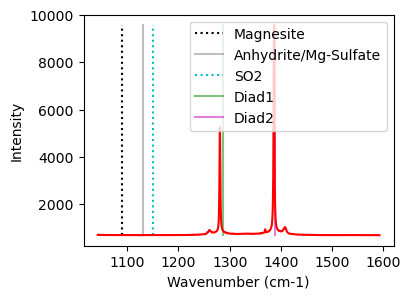

In [11]:
Diad_files=fit_params['filename']
i=5
filename_select=Diad_files.iloc[i] 
print(Diad_Files[i])
plot1=pf.plot_diad(path=spectra_path, filename=filename_select, filetype=filetype)

### Pick your other parameters

NOTE that you can also change the number of neighbors considered in the intensity factor (n),but n=1 is often the best. dynfact is the intensity factor cutoff above which pixels are considered outliers in the first pass (y axis on the first plot on the leftmost). dynfact_2 is the same, but for the second pass. The filter automatically disregards pixels that are known to be of interest (here diads, hbs and c13).


In [12]:
# This extract the peaks for the diads, HBs and C13 from fit_params_crr, essential to the CRR process.
diad_peaks=fit_params[['Diad1_pos','Diad2_pos','HB1_pos','HB2_pos','C13_pos']]

#Pick your settings
plot_rays='rays_only'#whether to plot the results or not
export_cleanspec=True #whether to export the spectra with the cosmic ray pixels removed
save_fig='all' #whether to save the figures, options are 'all' or the default 'rays_only'
dynfact=0.0005 #dynamic intensity factor for the first pass (y axis on the leftmost plots)
dynfact_2=0.001#dynamic intensity factor for the second pass
n=1 # number of neighboring pixels being compared, typically 1 is ideal.

exclude_ranges=[(1147,1160)] # List of tuples containing ranges to exclude from filtering (i.e., for secondary peaks

### Run the filter on the selected spectra
- rays_found is a dataframe containing the filename and whether cosmic rays were found. spectrum is the filtered spectrum in the form of a dataframe. 
- It contains nan values where the cosmic rays are. It is NOT for fitting.

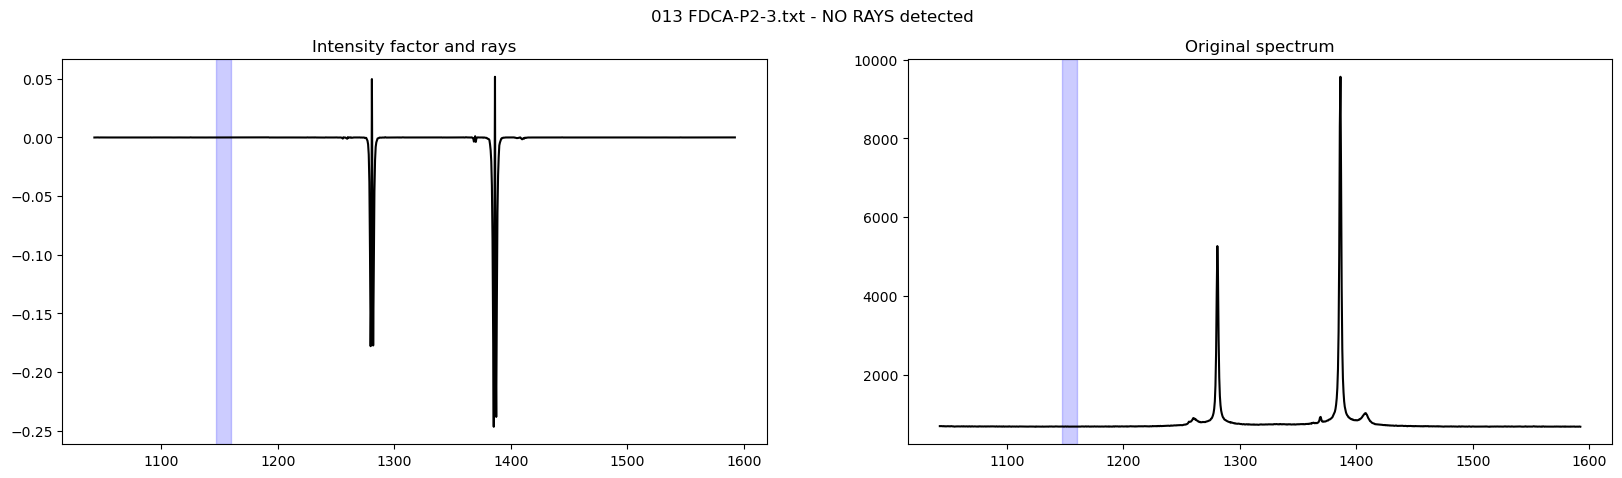

In [13]:
rays_found,spectrum=pf.cosmicray_filter.filter_singleray(path=spectra_path,
                                        exclude_ranges=exclude_ranges,filetype=filetype,
                                        Diad_files=Diad_files,i=i,diad_peaks=diad_peaks,plot_rays='all',
                                      export_cleanspec=export_cleanspec,save_fig=save_fig,dynfact=dynfact,dynfact_2=dynfact_2,n=n, filetype=filetype)


###  Loop over all other spectra
the output of this is the data_y_all file, which contains plottable spectra and the new fit_params file with filtered spectra

 54%|█████▍    | 84/156 [00:03<00:03, 20.72it/s]c:\users\charl\documents\python dev\diadfit\src\DiadFit\cosmicray_filter.py:244: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1,5,figsize=figsize)
100%|██████████| 156/156 [00:06<00:00, 23.14it/s]


filename rays_present  approx_split    Diad1_pos    Diad2_pos  \
0  003 FDCA-P1-1.txt        False    105.570637  1280.778152  1386.348790   
1  005 FDCA-P1-2.txt        False    105.576137  1280.772653  1386.348790   
2  007 FDCA-P1-3.txt        False    105.576137  1280.767153  1386.343290   
3  009 FDCA-P2-1.txt        False    105.559638  1280.800151  1386.359789   
4  011 FDCA-P2-2.txt        False    105.559638  1280.800151  1386.359789   

       HB1_pos      HB2_pos      C13_pos  Diad1_abs_prom  Diad2_abs_prom  ...  \
0  1260.512065  1407.659803  1369.217484     4847.457414     9482.707955  ...   
1  1260.127092  1407.687301  1369.255982     5083.317217     9889.857815  ...   
2  1260.550563  1408.050276  1369.134990     4766.794313     9232.841715  ...   
3  1260.633057  1407.764296  1369.156989     4522.867575     8785.610192  ...   
4  1260.297580  1408.033777  1369.129490     4642.192380     9106.569275  ...   

    HB2_height  C13_height  Diad1_height  HB1_height  Diad1_Median_Bck  \
0  1040.431258  963.903522   5573.657426  919.010349        726.200012   
1  1059.938968  972.331543   5808.817217  916.425249        725.500000   
2  1044.114609  955.661146   5491.994325  906.975638        725.200012   
3  1025.532018  941.036394   5244.367575  898.212086        721.500000   
4  1038.608365  947.128186   5364.192380  908.113328        722.000000   

   Diad2_Median_Bck  C13_HB2_abs_prom_ratio  Diad2_HB2_Valley_prom  \
0        728.100006                2.253320               1.183347   
1        727.799988                2.396952               1.182645   
2        727.949997                2.398794               1.170953   
3        723.250015                2.360952               1.170313   
4        724.199982                2.412072               1.176454   

   HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0                  65.142963                  99.874680  
1                  65.252712                 106.412839  
2                  60.246187                  97.908421  
3                  62.773977                 100.947874  
4                  79.360703                 126.185087  

[5 rows x 40 columns]

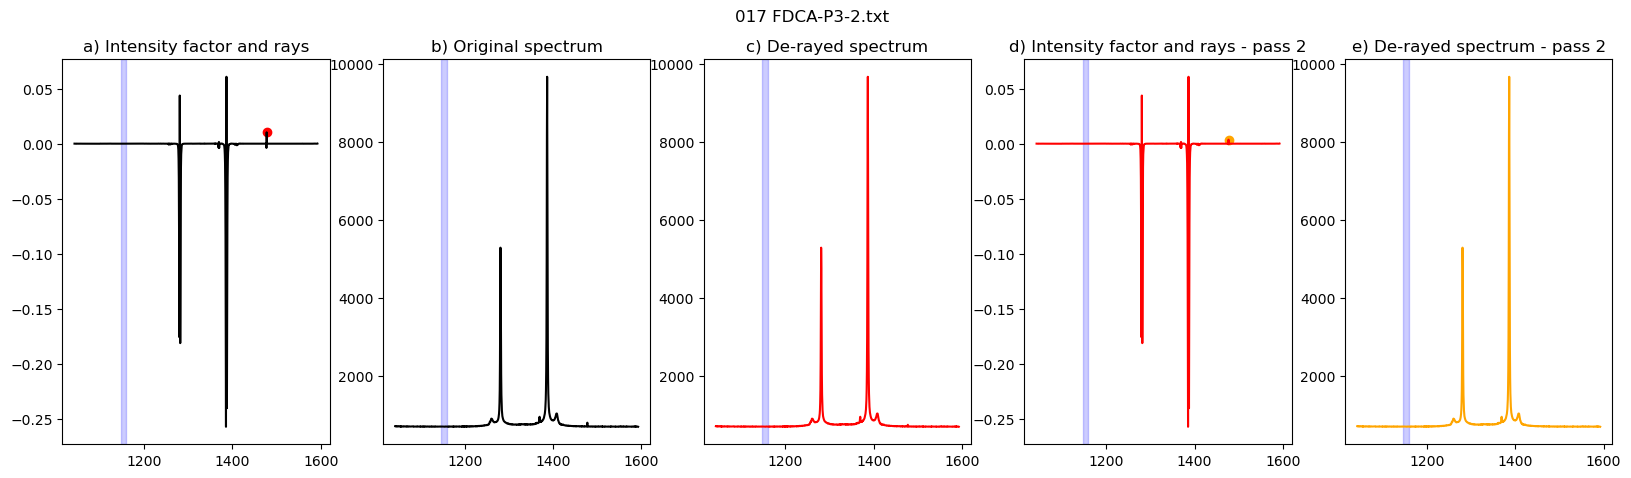

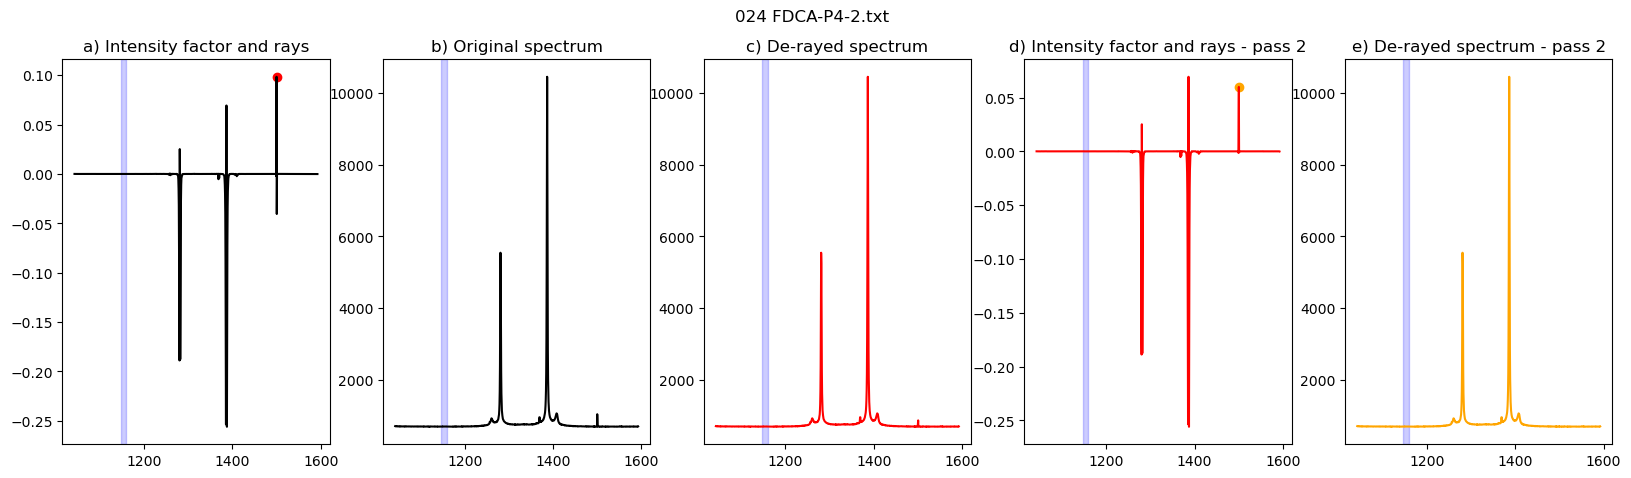

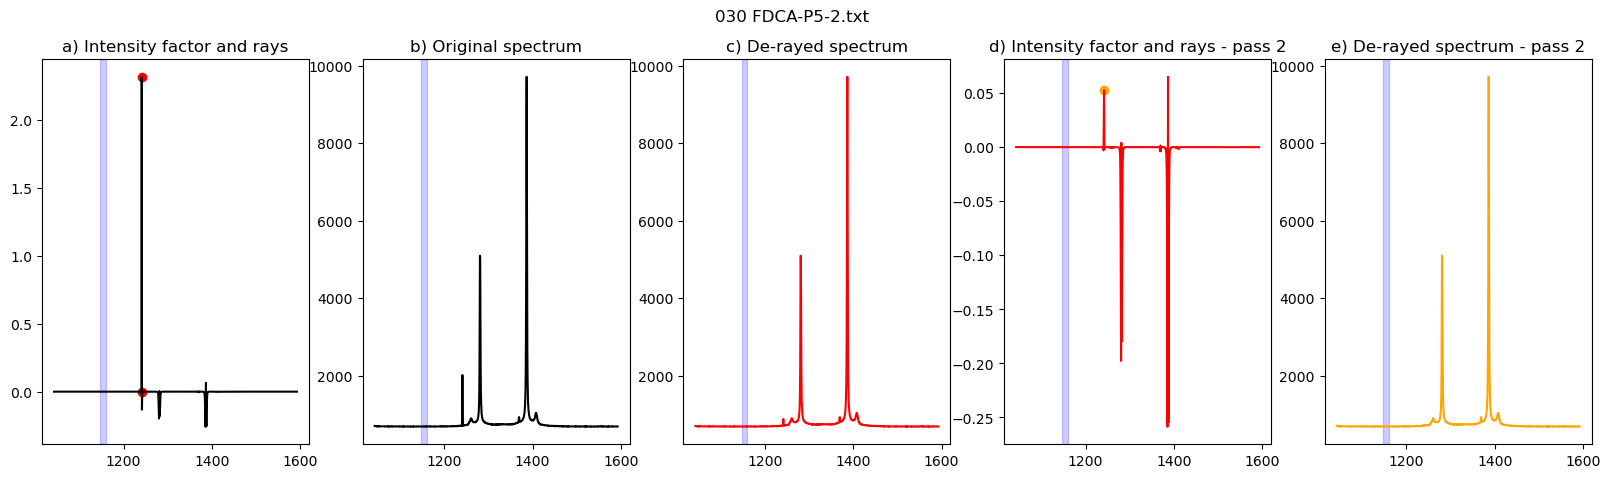

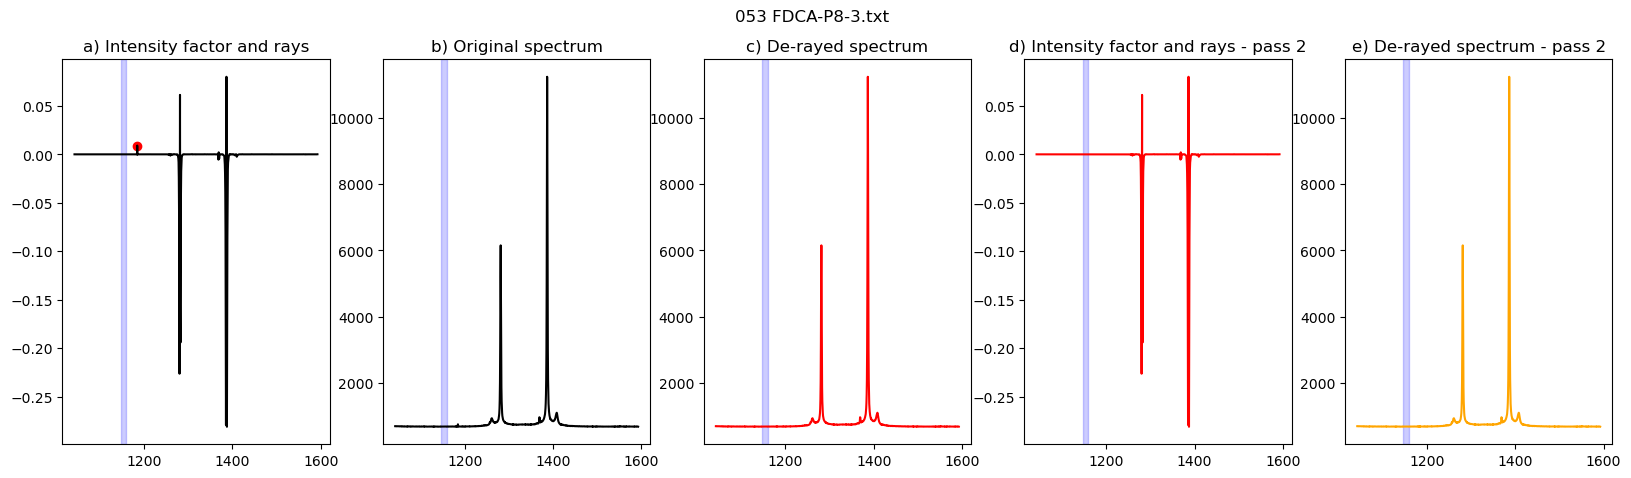

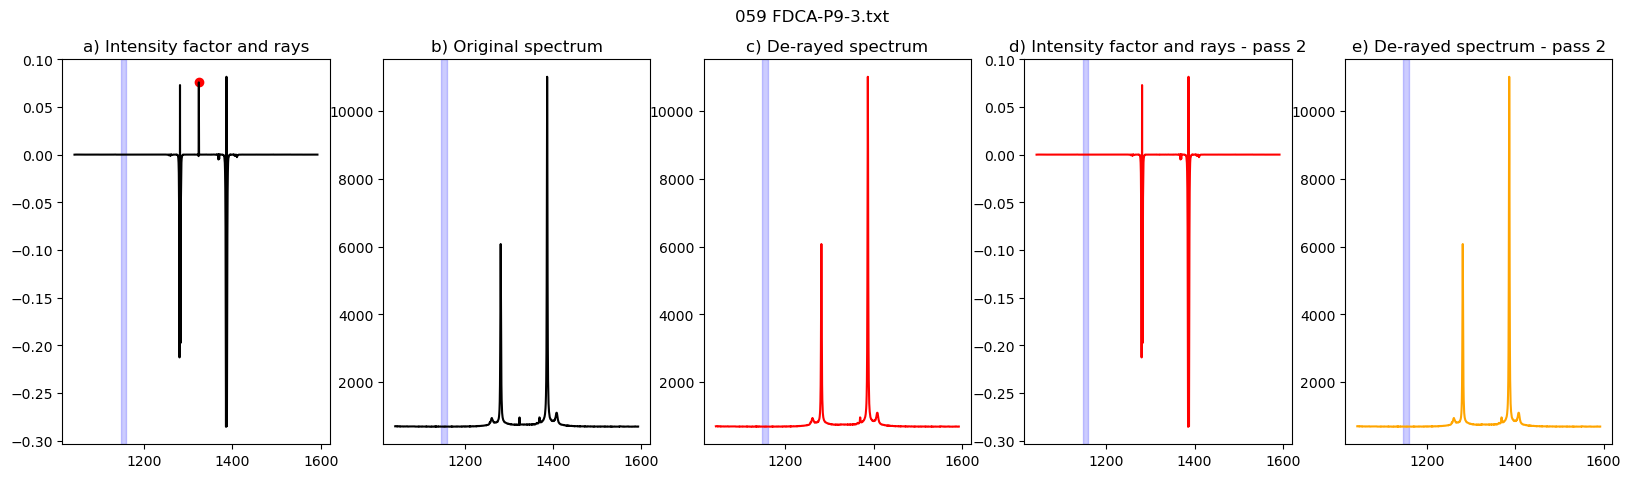

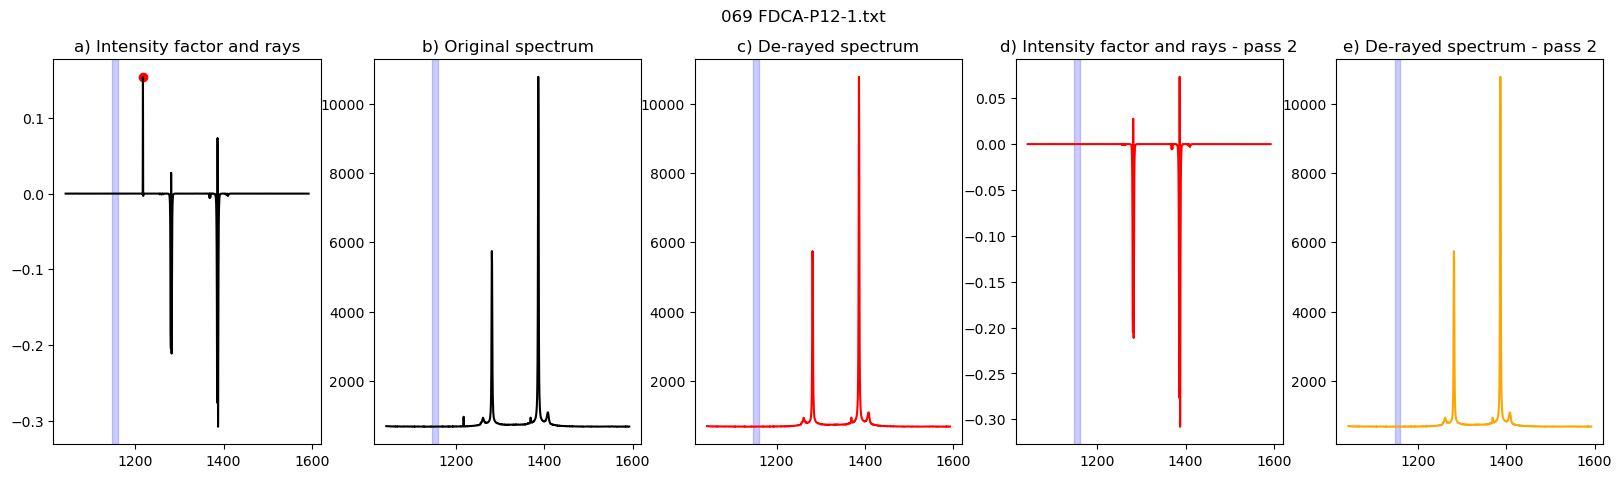

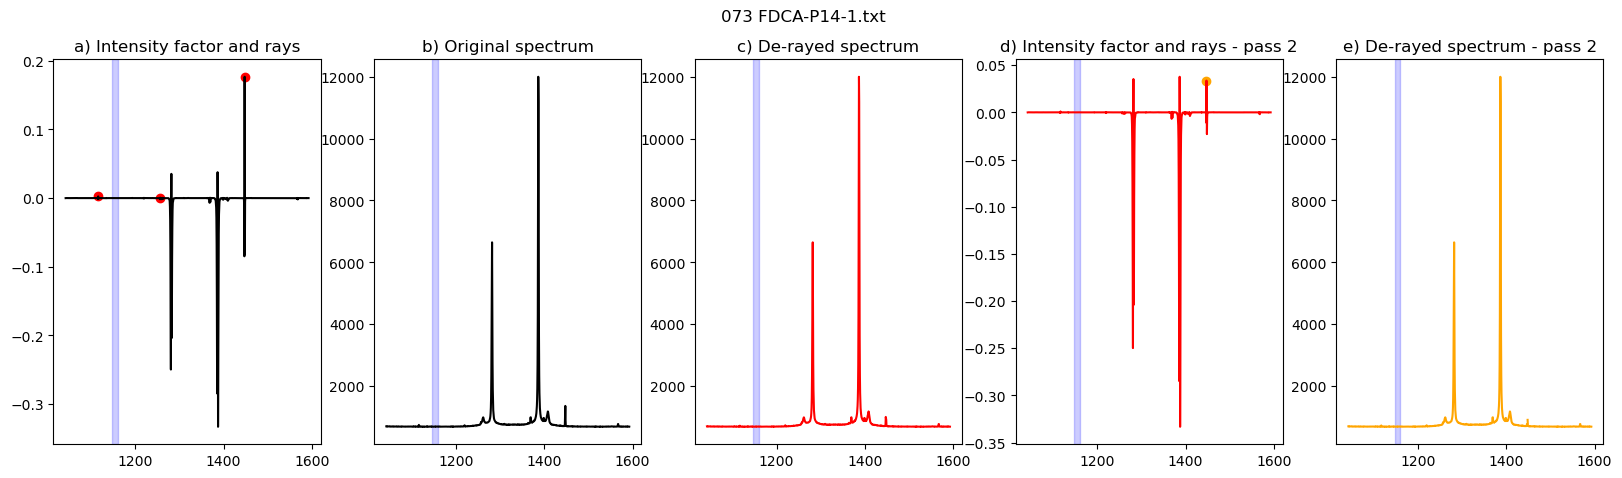

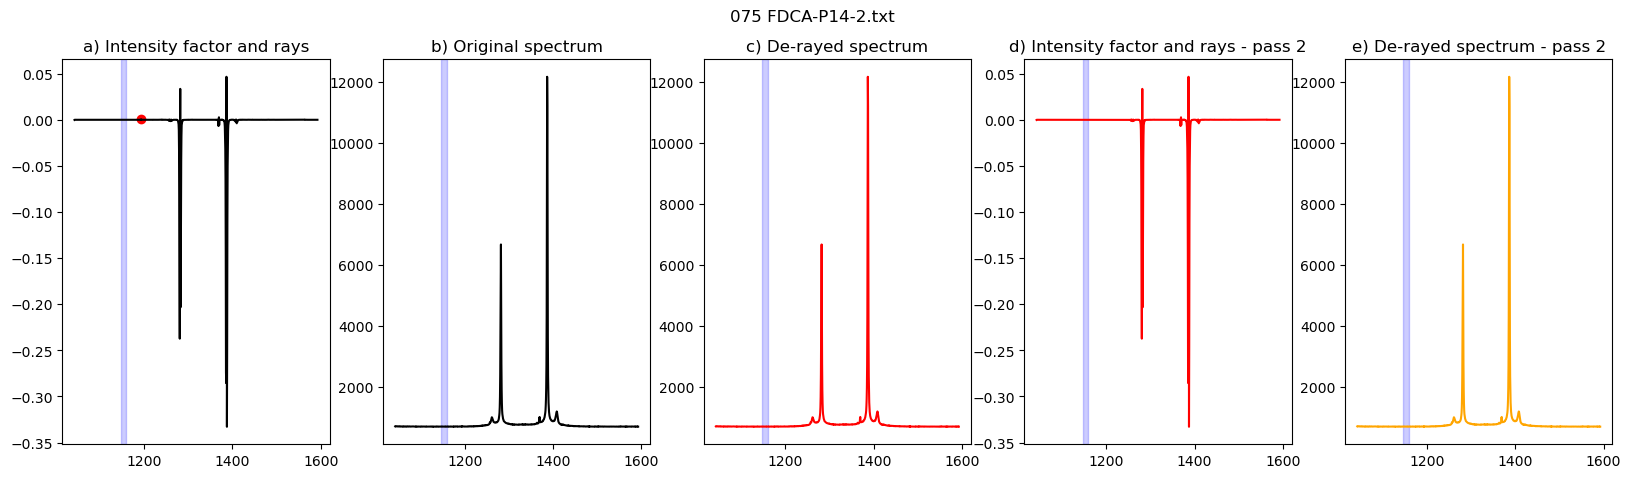

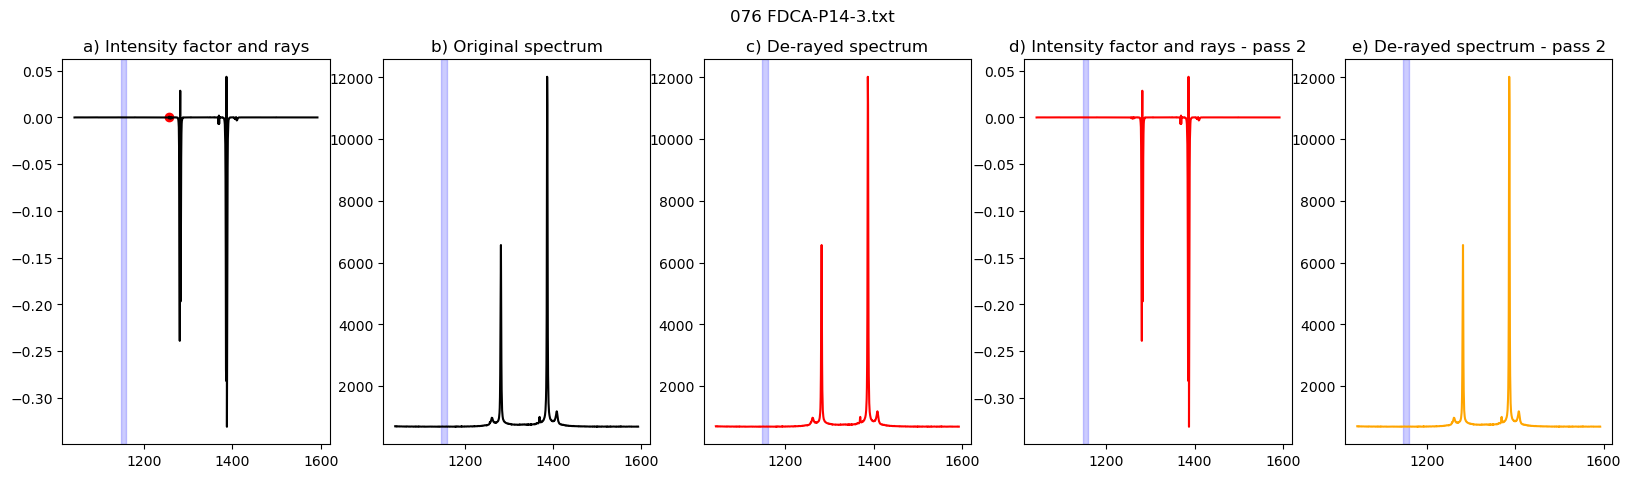

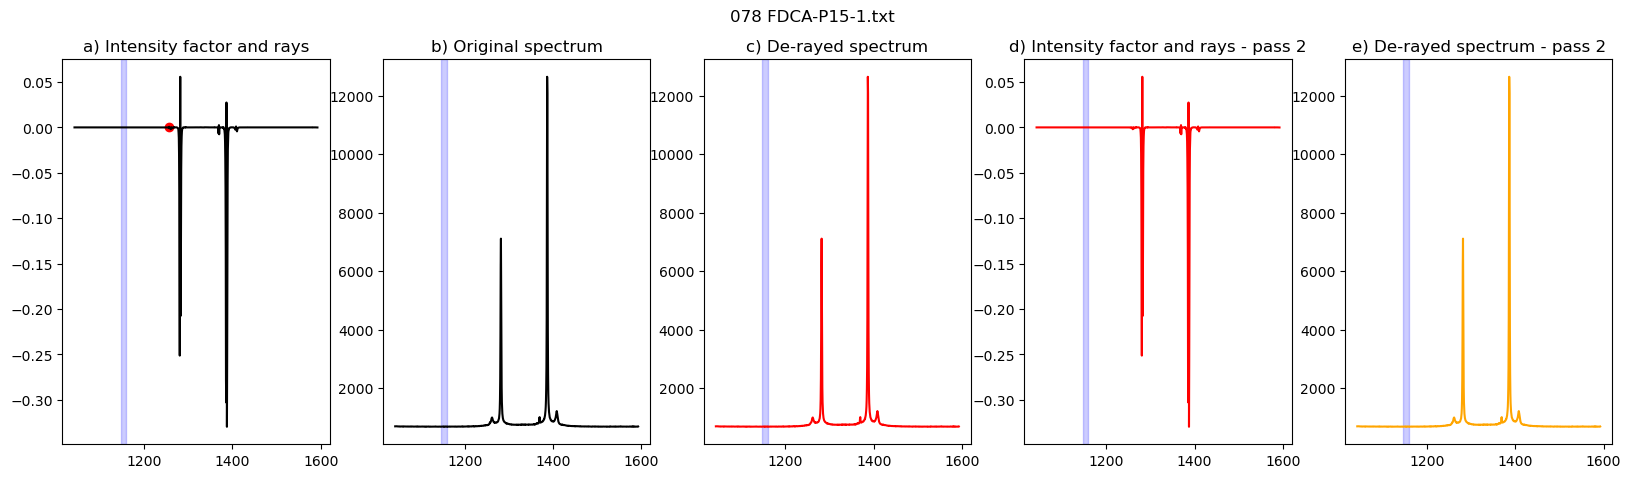

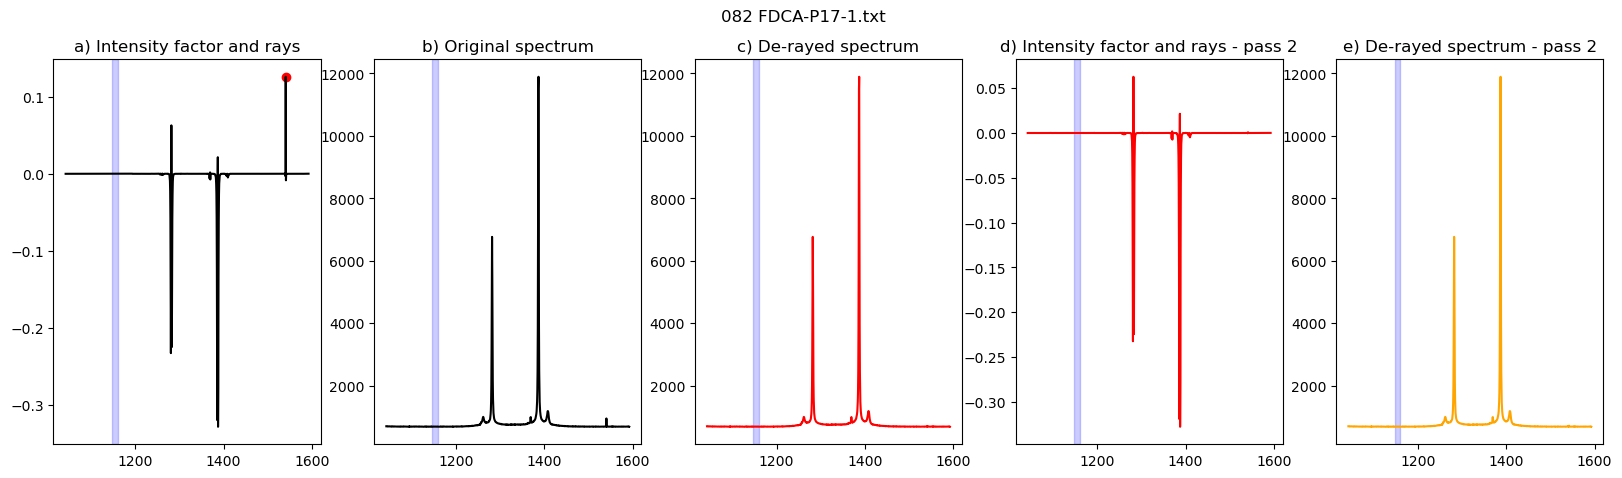

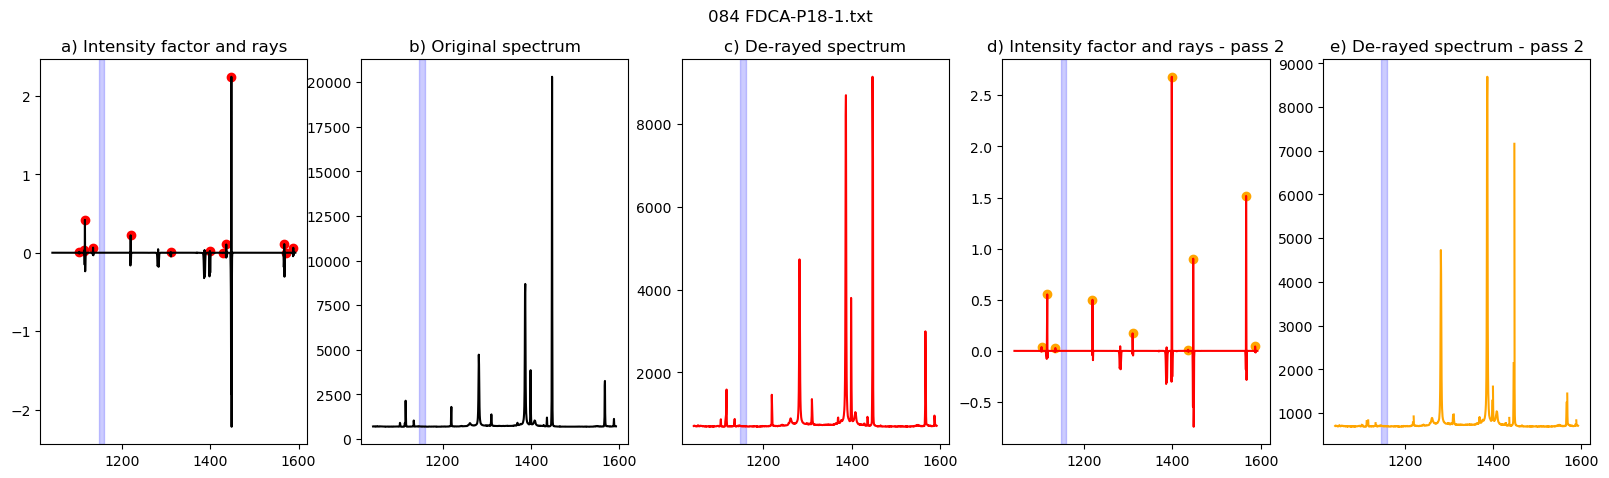

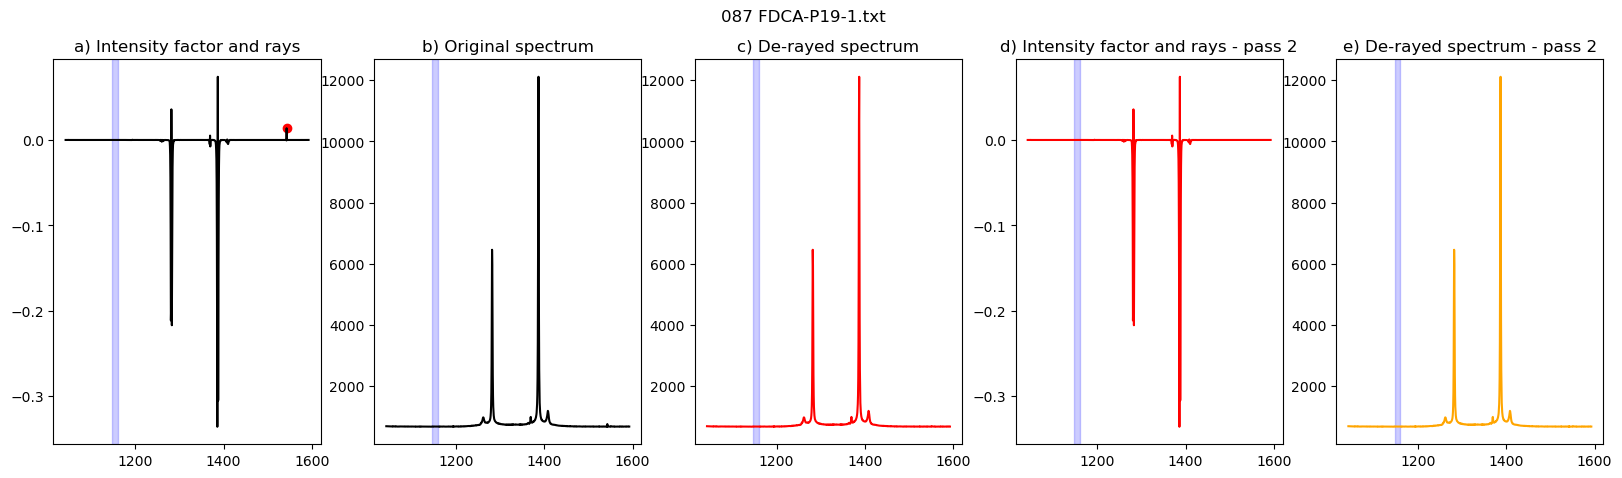

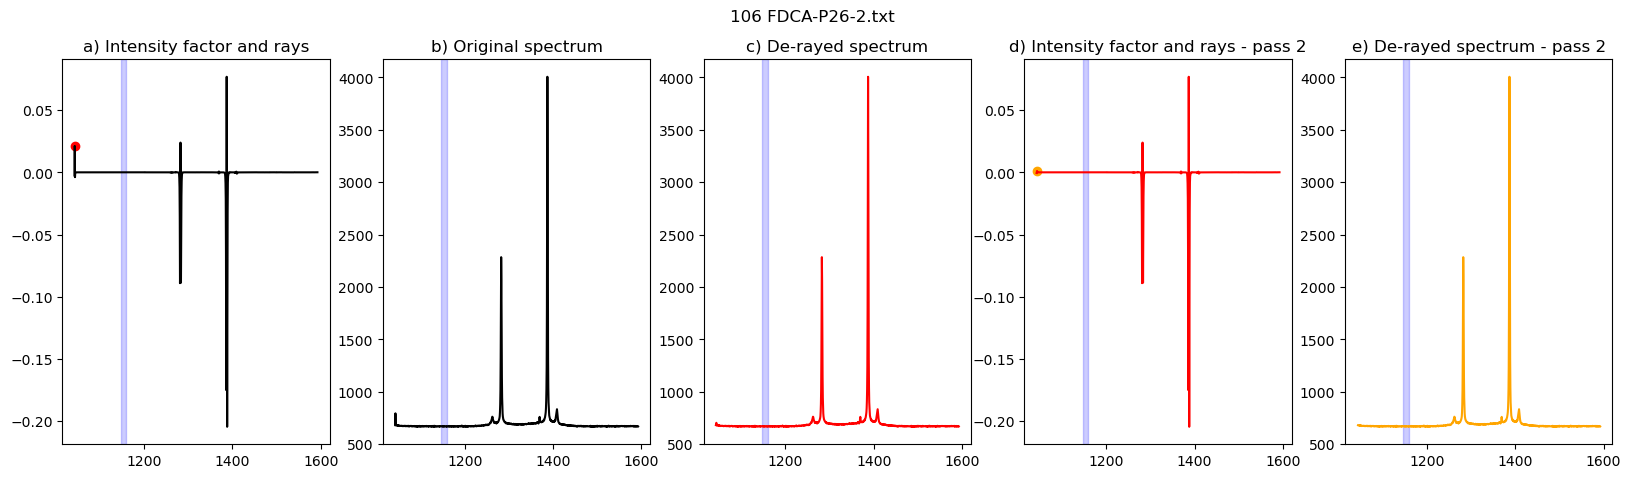

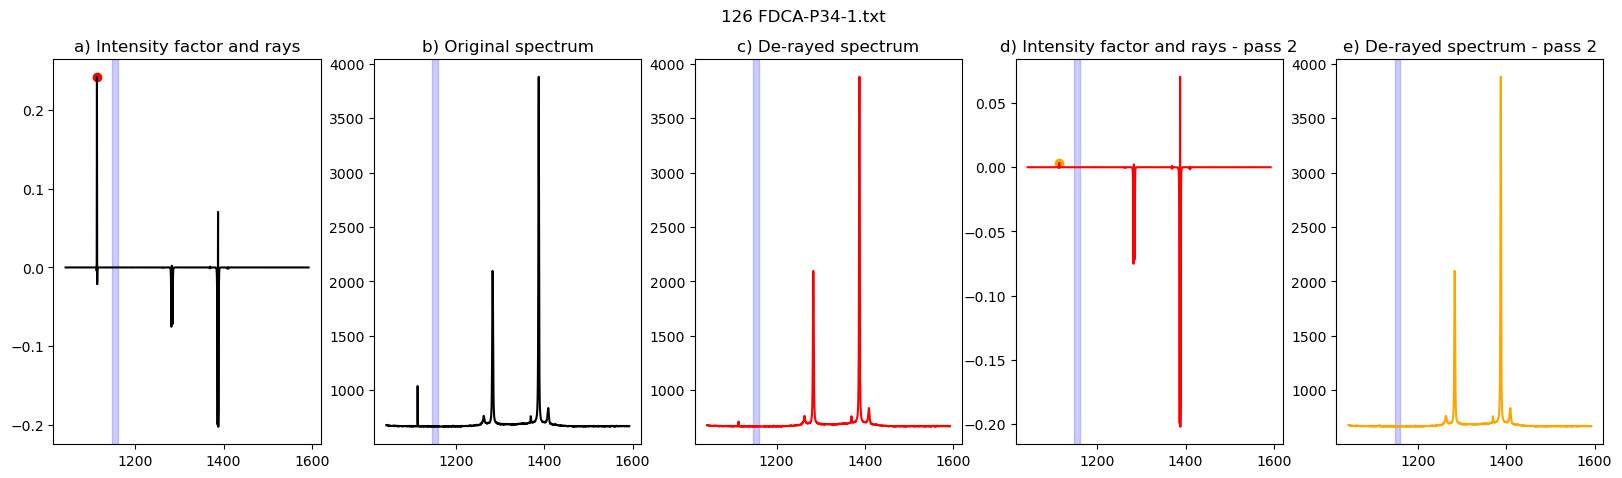

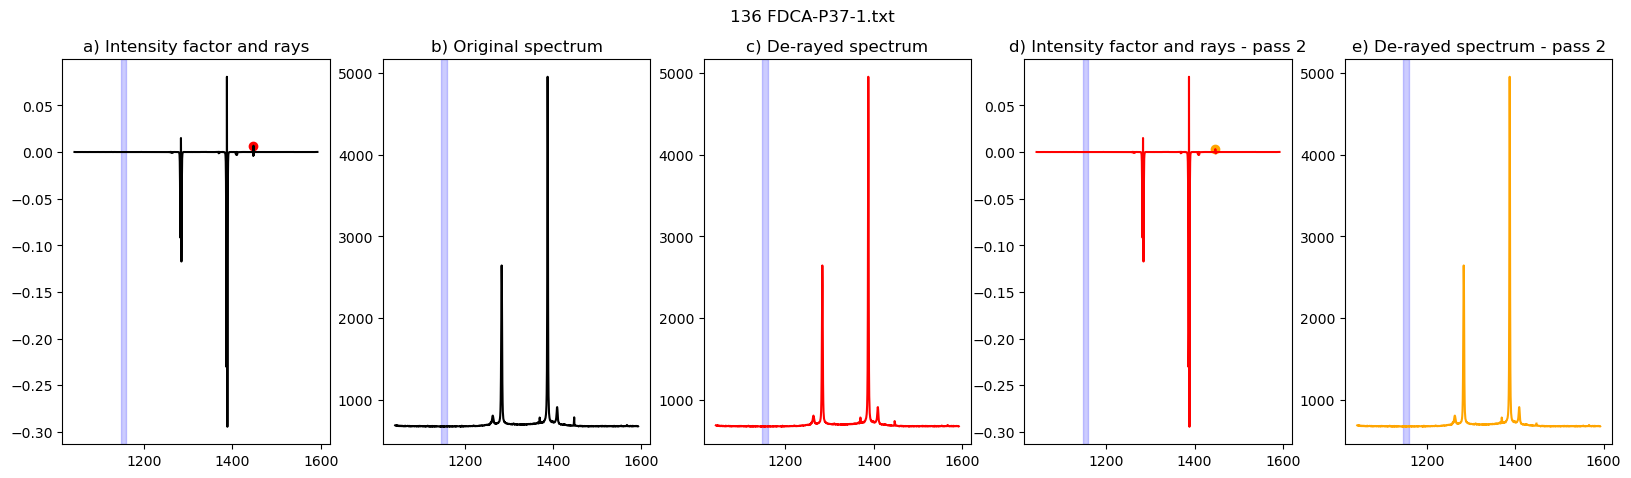

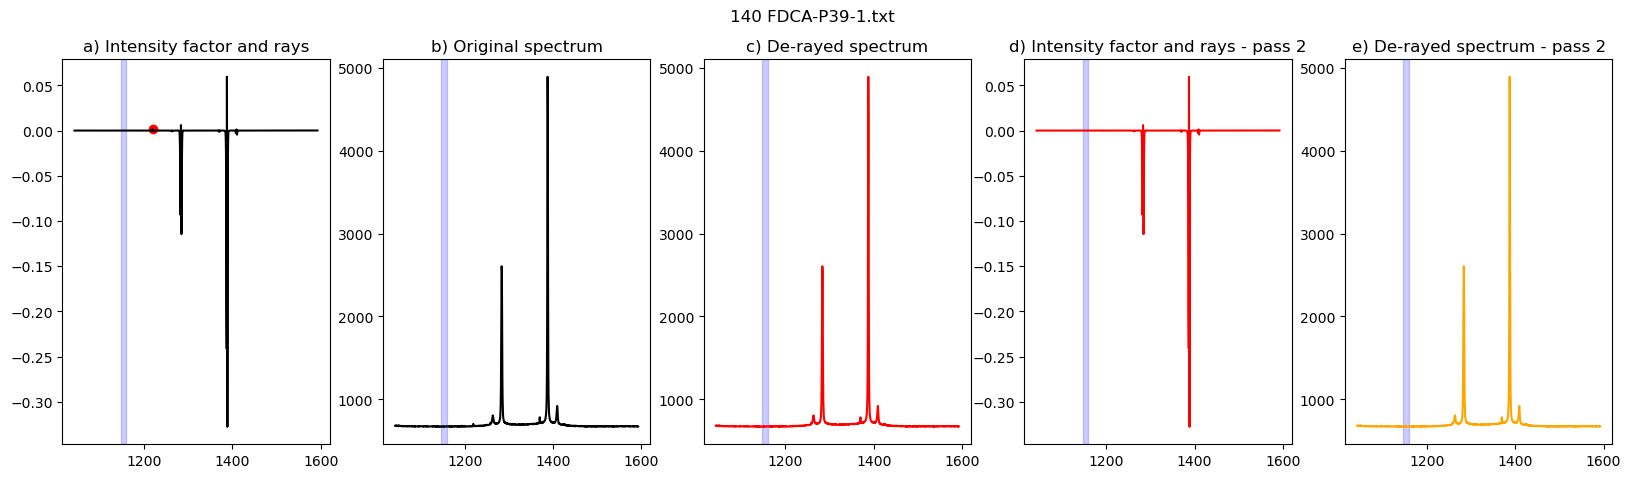

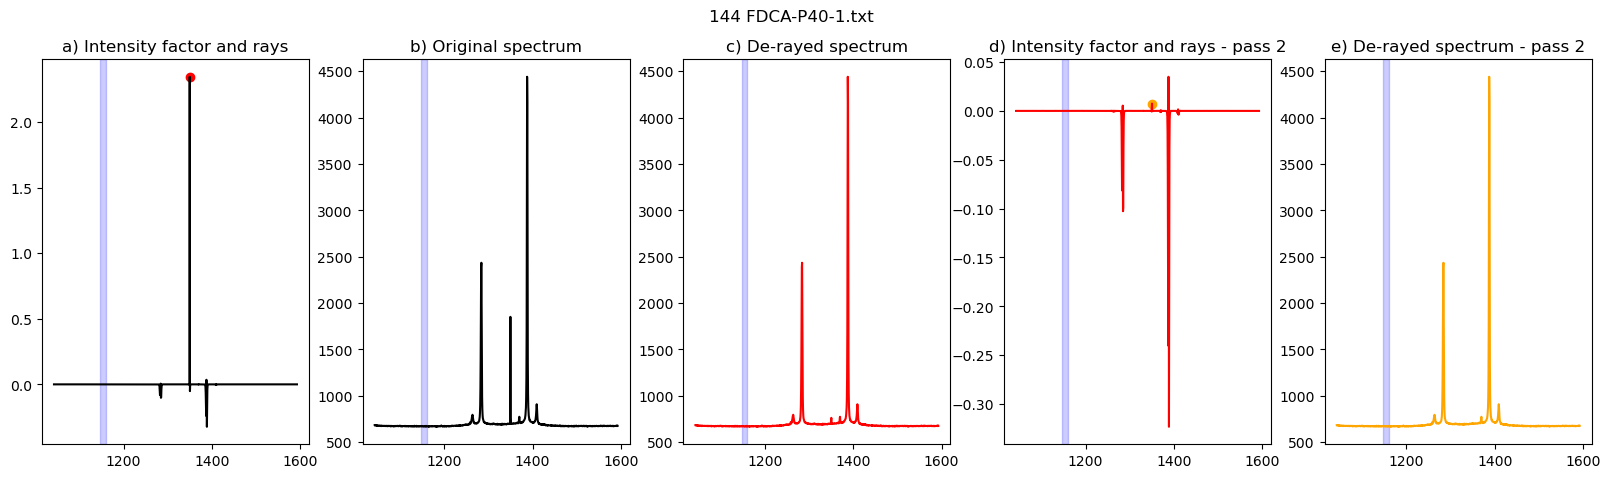

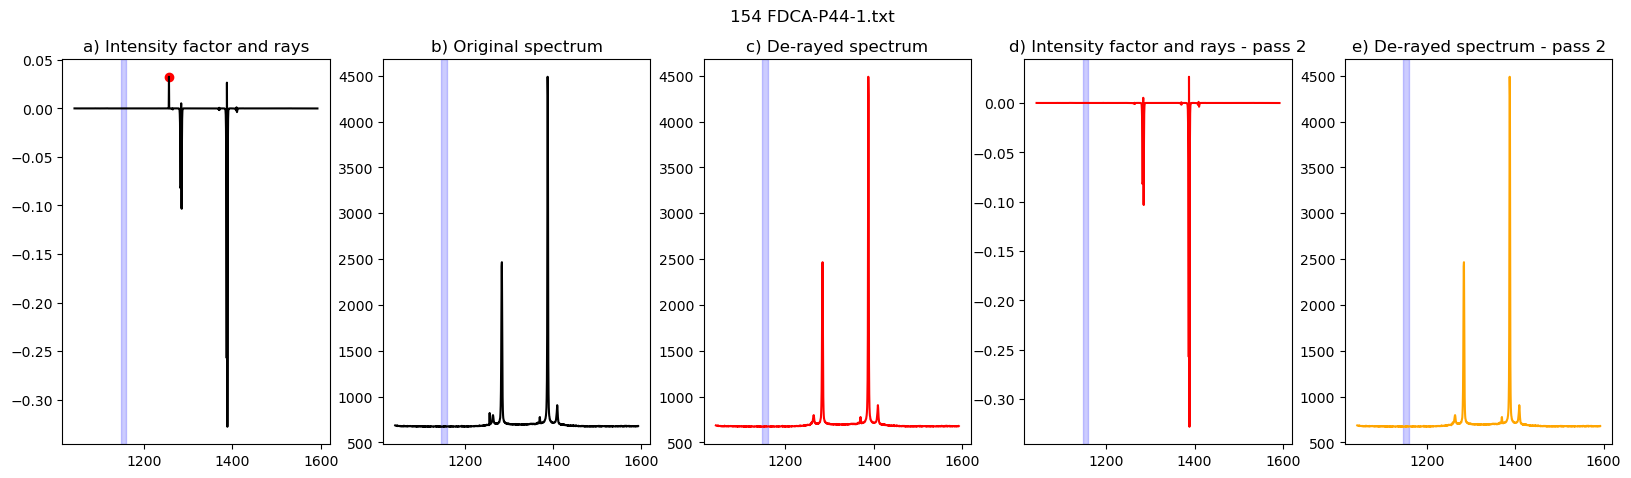

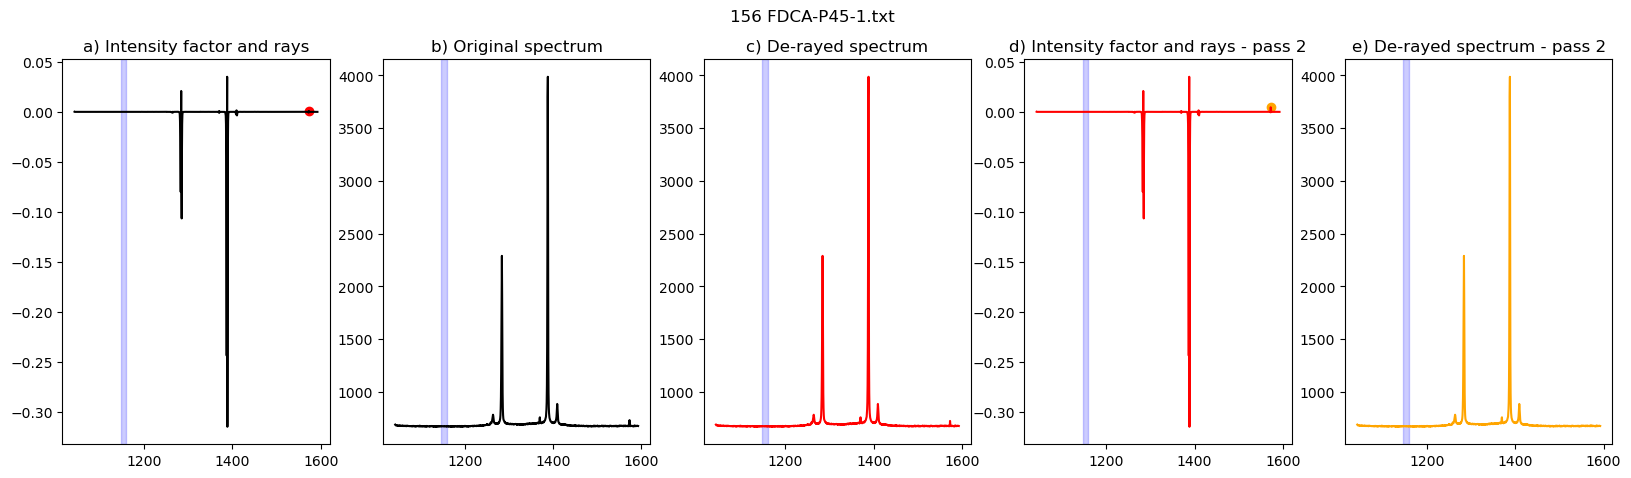

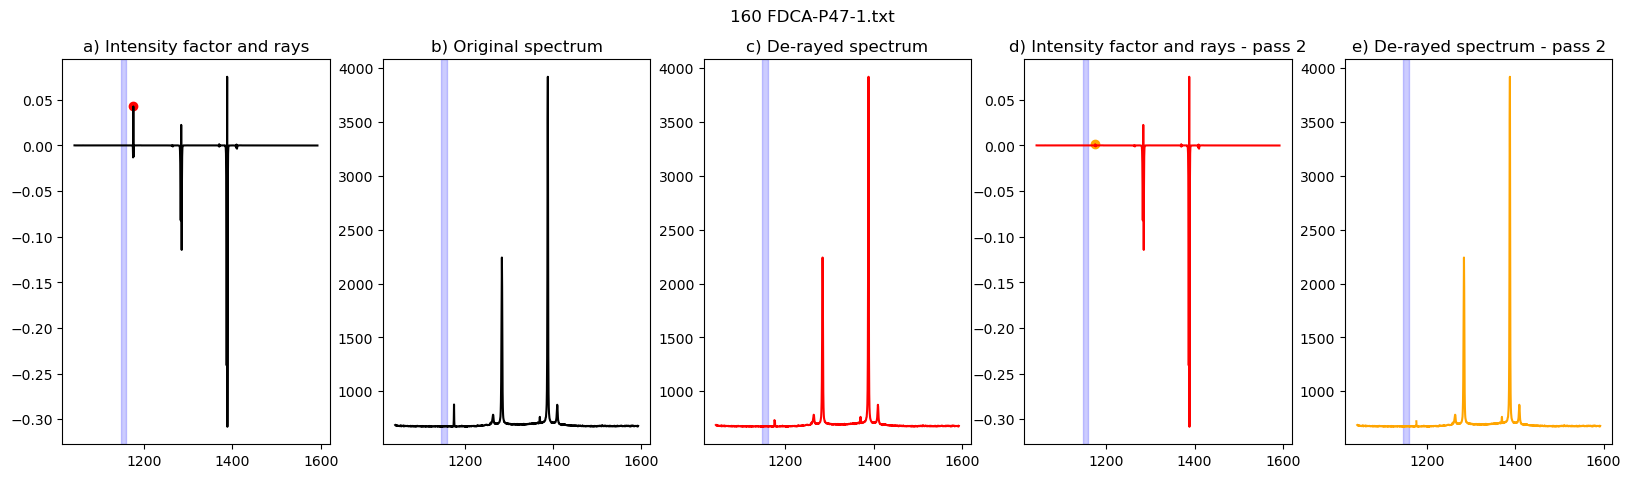

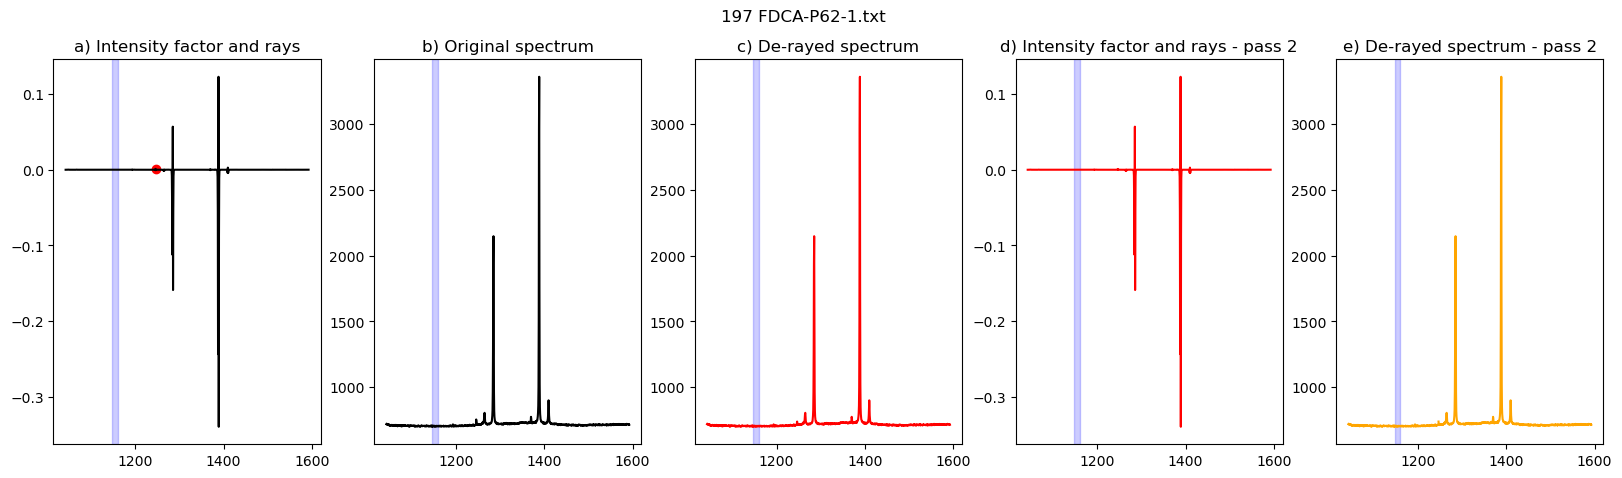

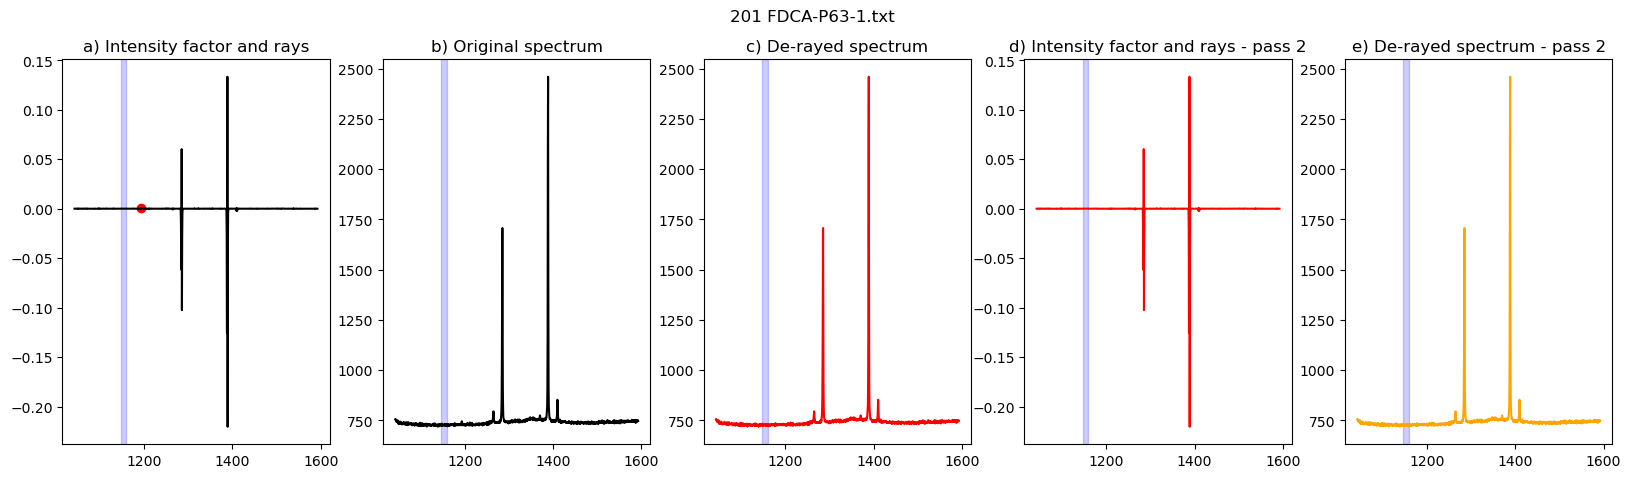

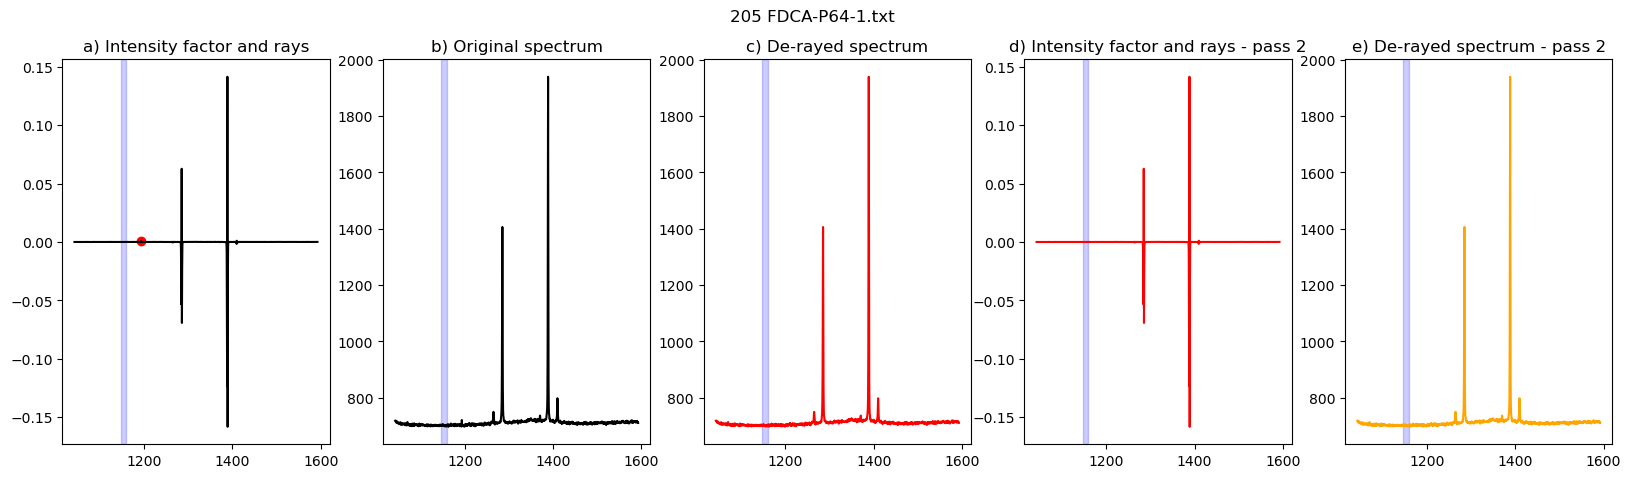

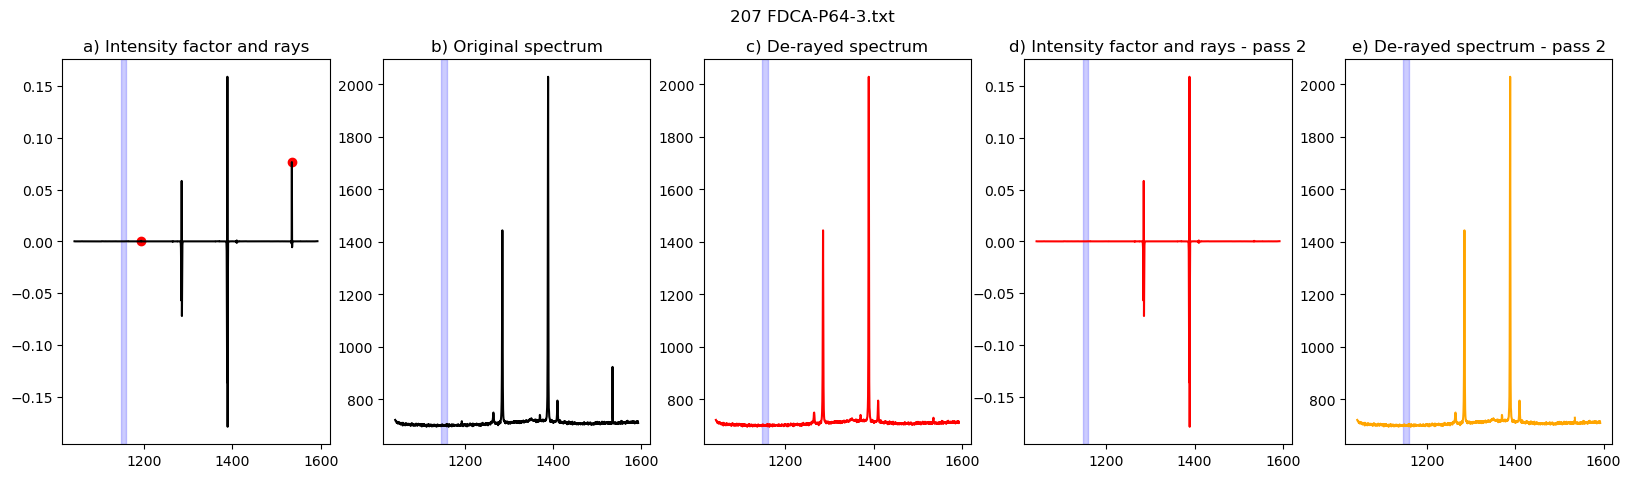

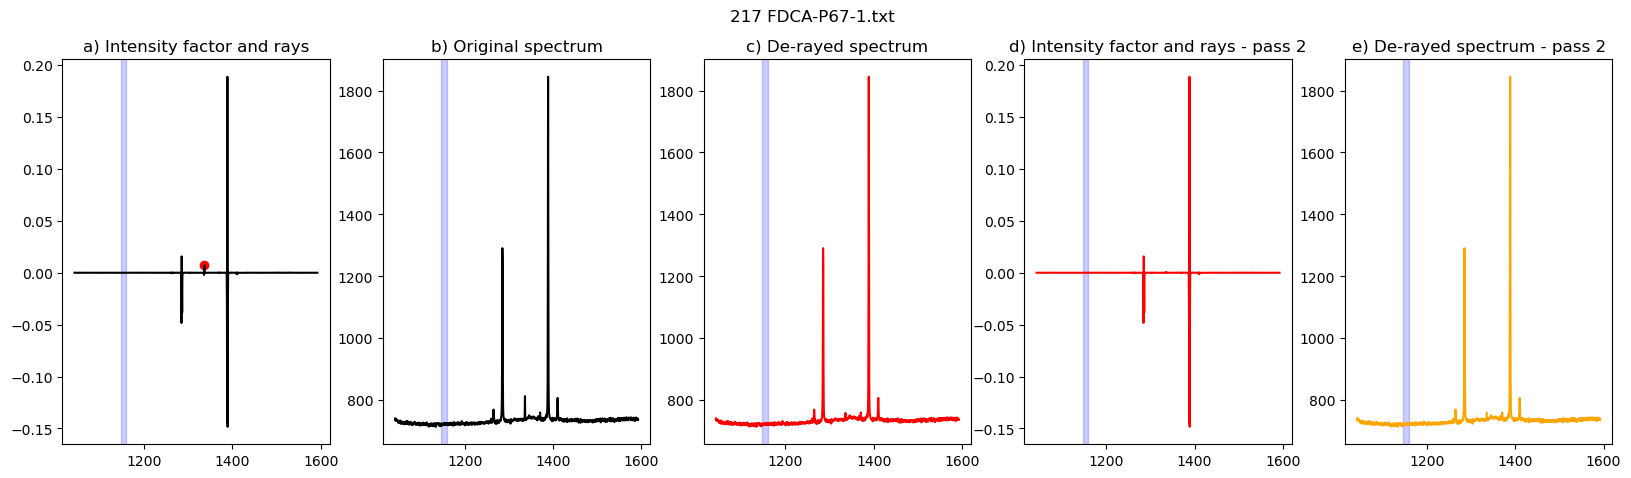

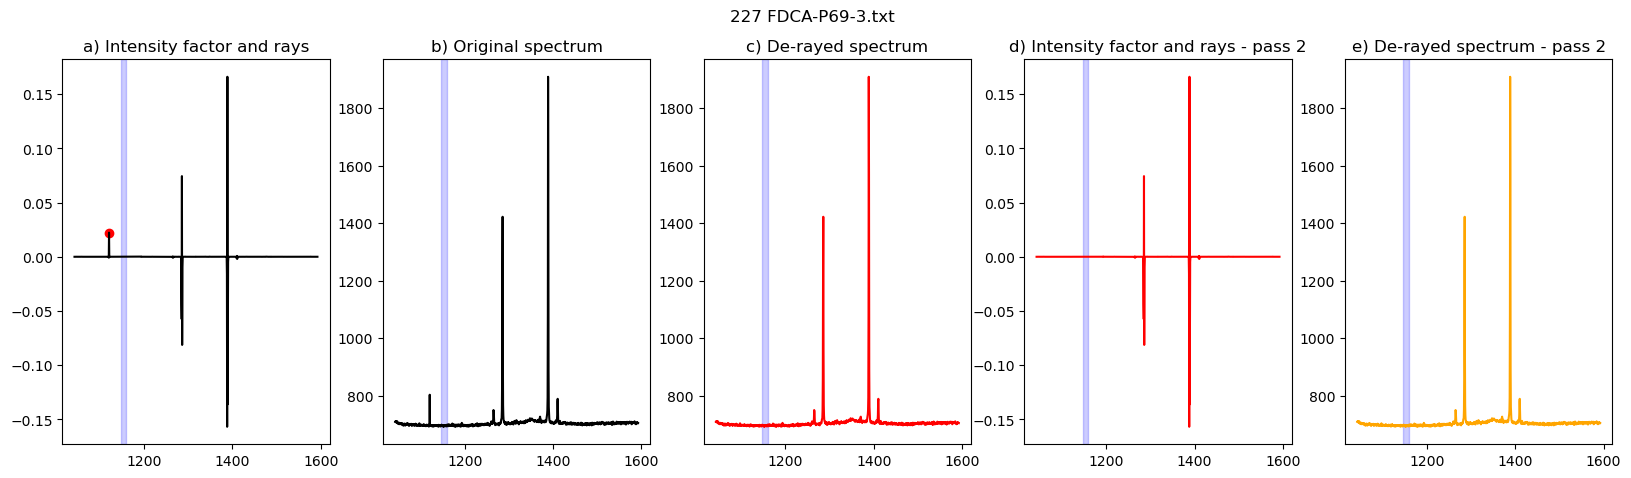

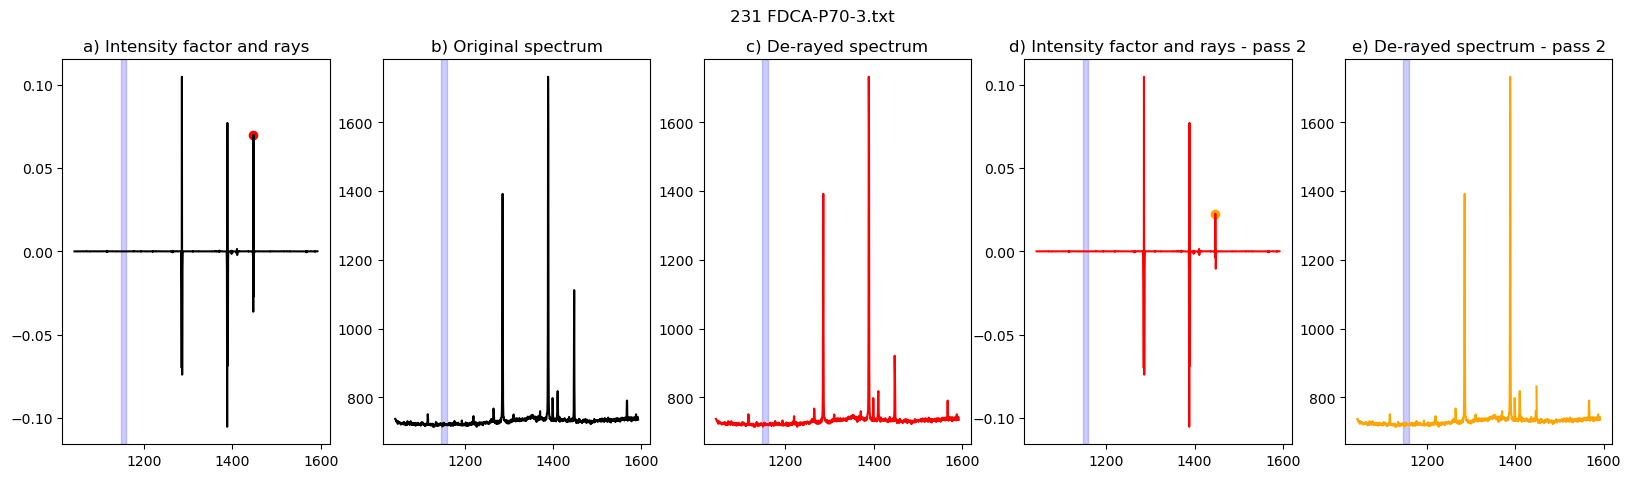

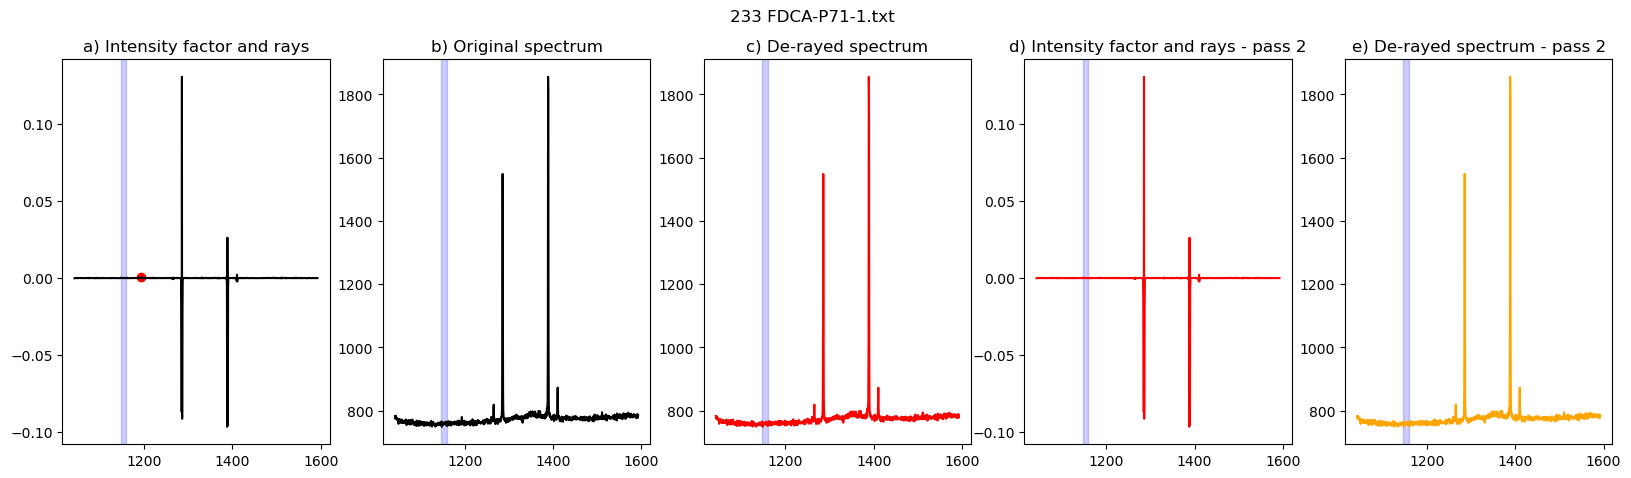

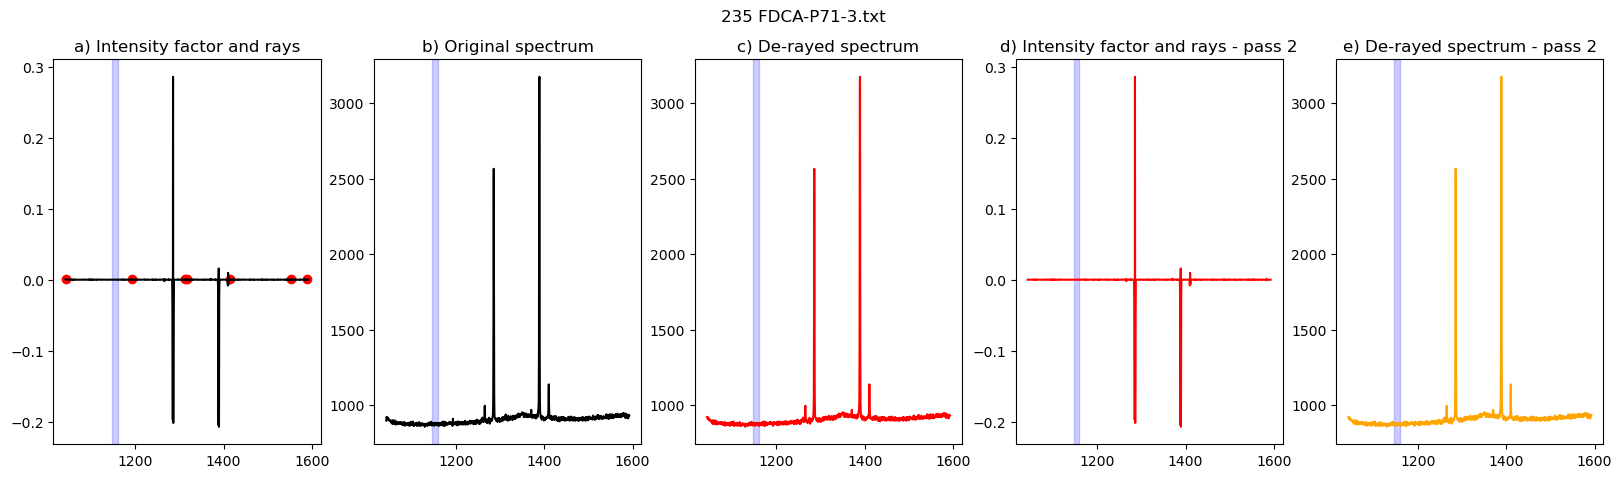

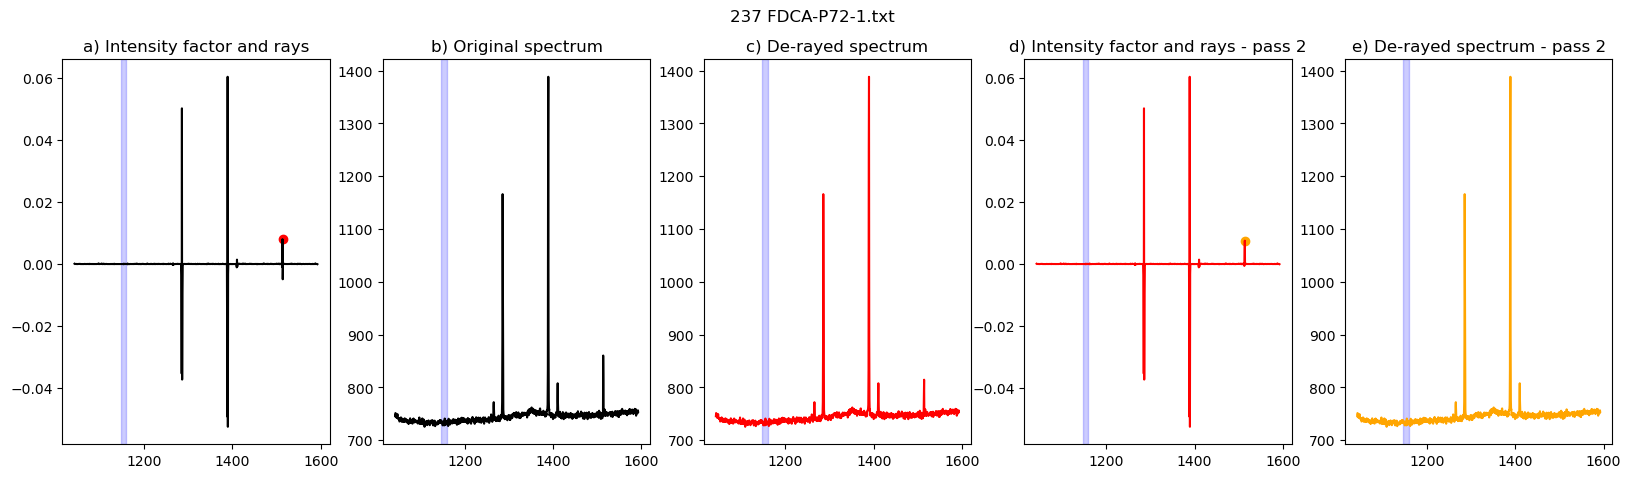

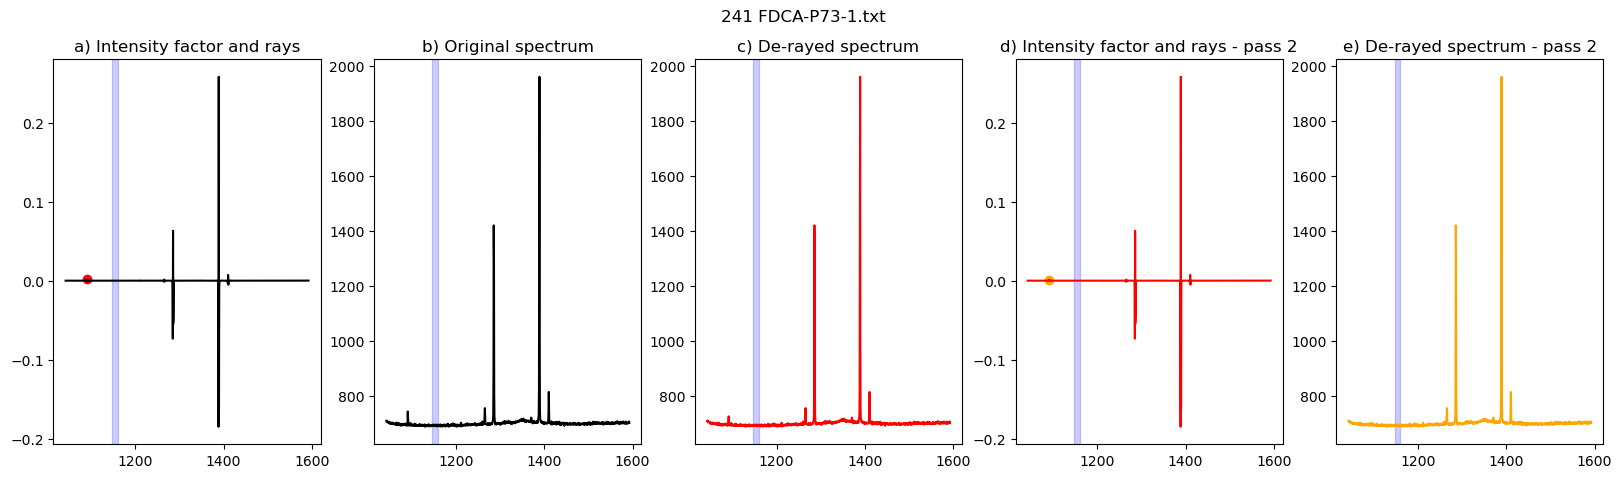

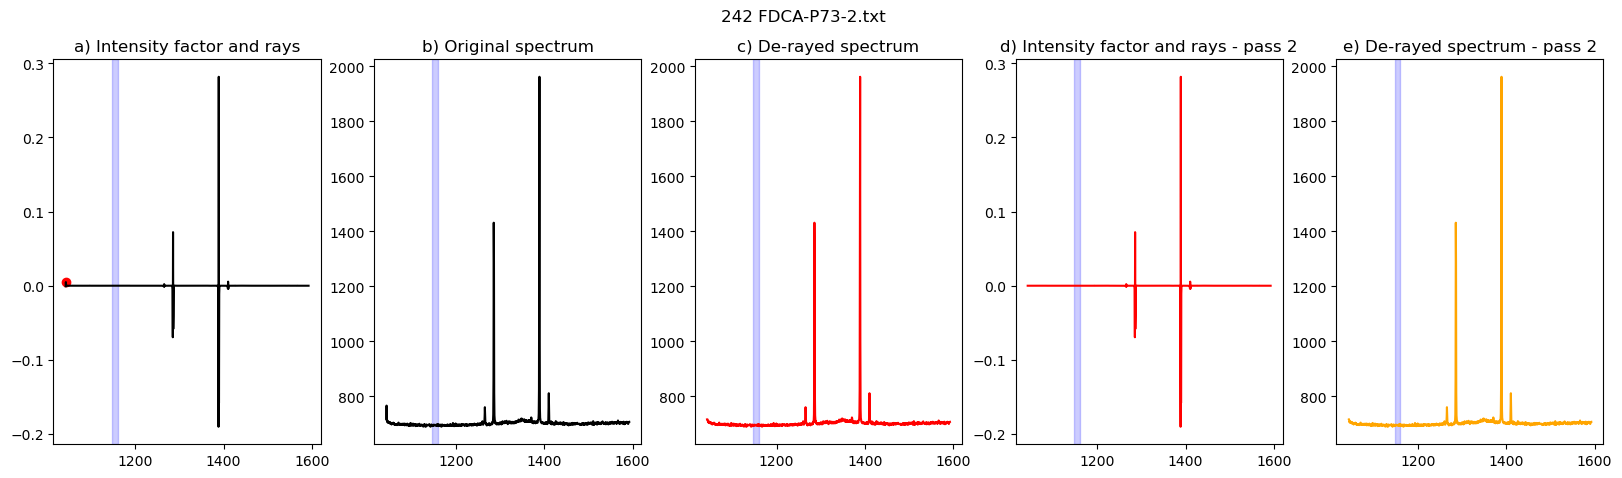

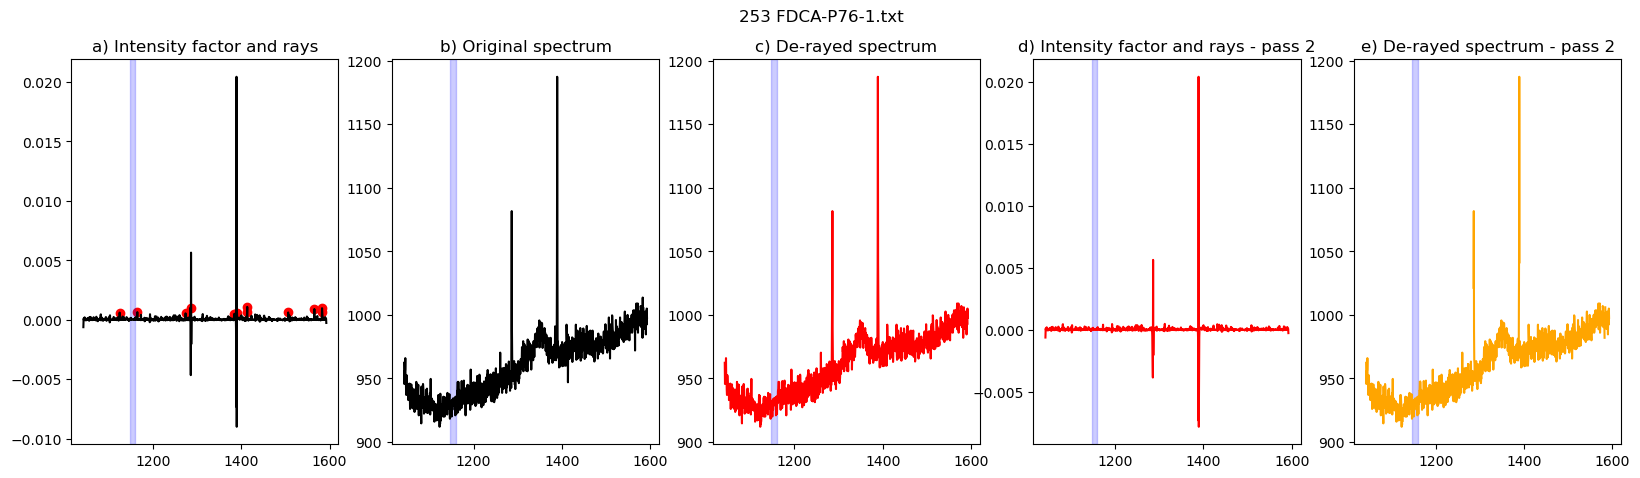

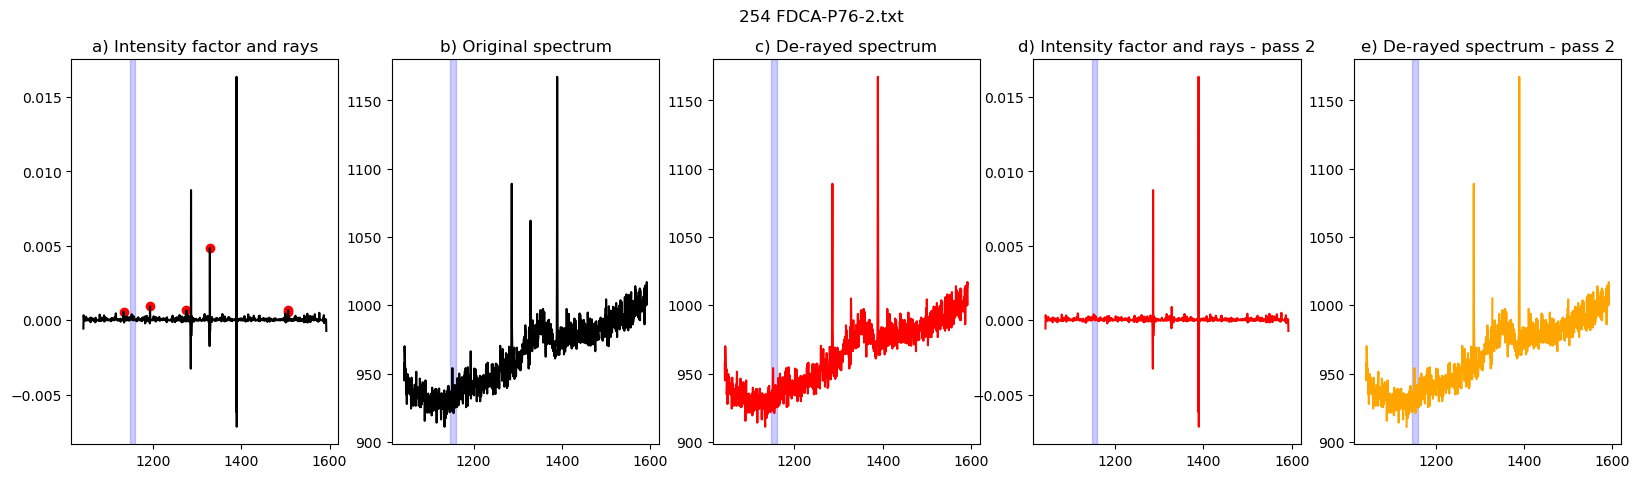

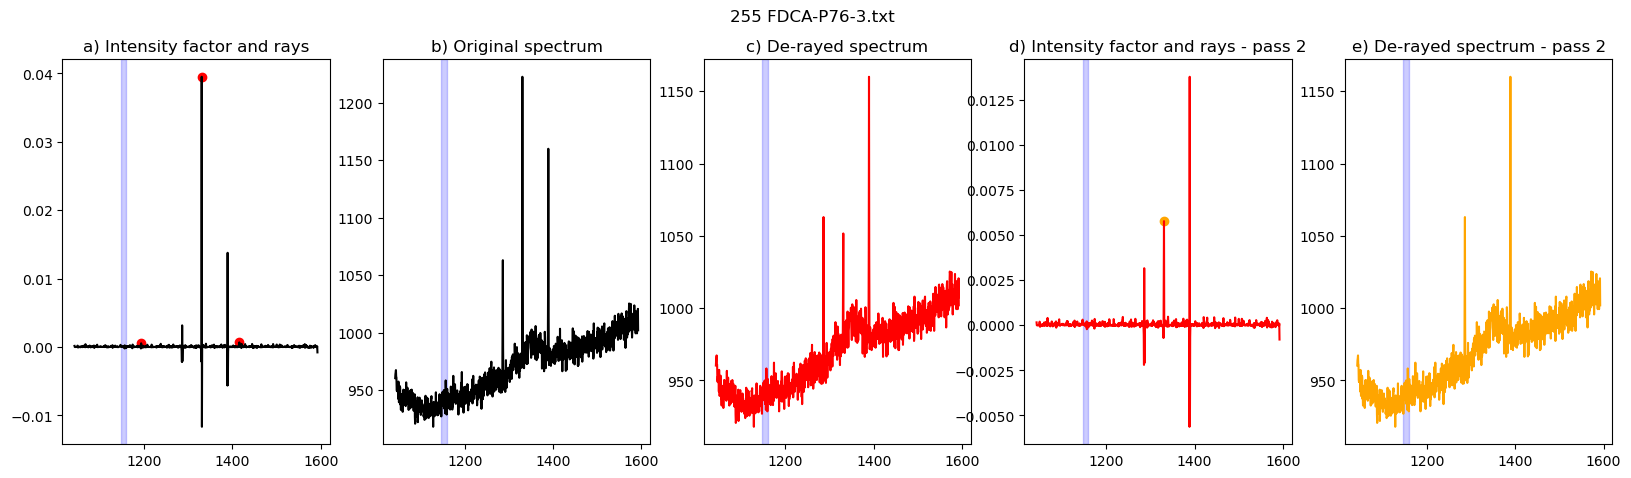

In [14]:

data_y_all_crr,fit_params_crr=pf.cosmicray_filter.filter_raysinloop(Diad_files=Diad_files, spectra_path=spectra_path, 
                exclude_ranges=exclude_ranges,
                    fit_params=fit_params, diad_peaks=diad_peaks,plot_rays=plot_rays,
                    export_cleanspec=export_cleanspec,save_fig=save_fig,dynfact=dynfact,dynfact_2=dynfact_2,n=n, filetype=filetype)

### Plot peak parameters 
- This will help you inspect clear cut offs you can use to split your diads into groups for fitting
- You can enter different x and y coordinates from the dataframe headings above

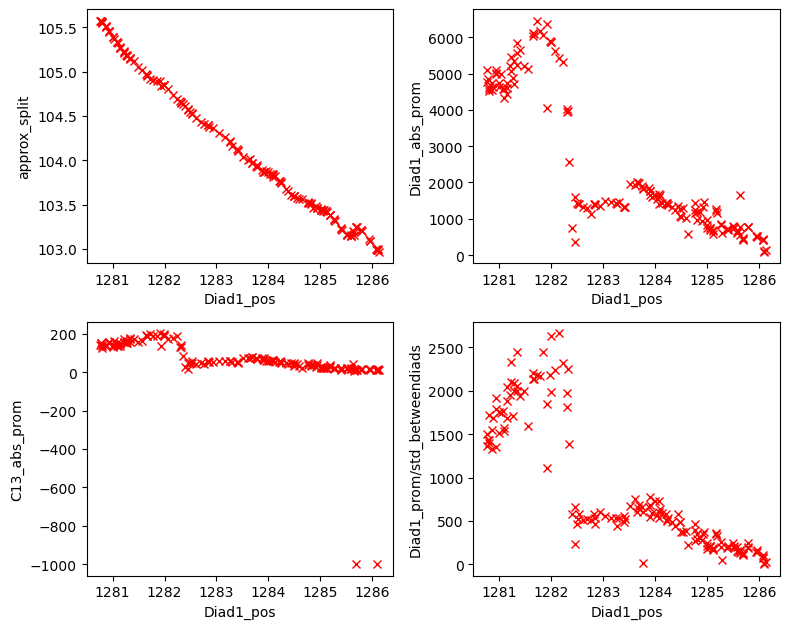

In [15]:
fig=pf.plot_peak_params(fit_params=fit_params_crr, 
                     x_param='Diad1_pos',  y1_param='approx_split',
                    y2_param='Diad1_abs_prom', y3_param='C13_abs_prom',
                    y4_param='Diad1_prom/std_betweendiads', fill_na=-1000)

### Filter out ones with really bad splitting or really low diad prominence
- Here, we only take files with splitting between 101-108 (you will need to tweak this for each instrument)
- We also only take files with a prominence of diad 1 >10
- None here got filtered out, but these can be helpful filters on other datasets

Keeping N=156
Discarding N=0


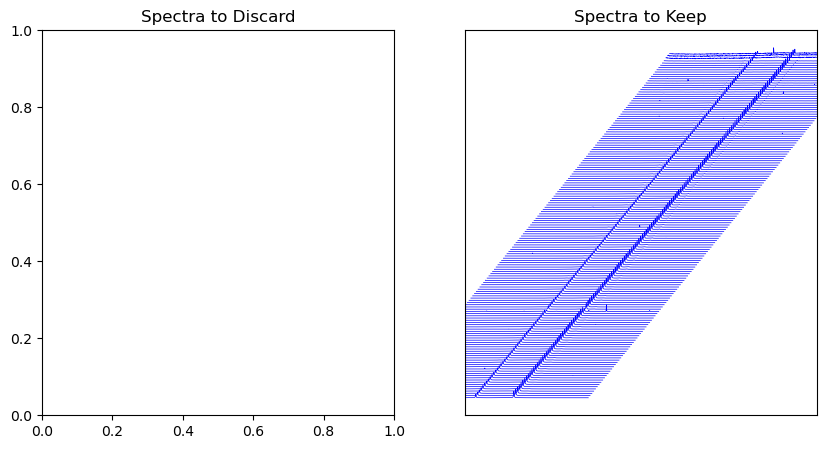

In [16]:
fit_params_filt, data_y_filt, fit_params_disc, data_y_disc=pf.filter_splitting_prominence(
fit_params=fit_params_crr, data_y_all=data_y_all, x_cord=Diad[:, 0],
splitting_limits=[101, 108], lower_diad1_prom=10)

### Now apply filters to find the weakest diads (e.g. ones you wouldnt want to fit a hotband too)
- In this case, we find the best filters are the position of Diad1 (shifts way more than Diad2), 
and where HB2 had a prominence (e.g., not nan because it wasnt found) 
- We find it also helpful to apply a filter, e.g. weak is Diad1pos<1287 or HB2 prominence nan, and  the prominence of Diad1 is <300X the standard deviation of the diad region

In [17]:
#If you need to plot a single one to tweak next step
#plot1=pf.plot_diad(path=spectra_path, filename='FG04-A17-2.txt', filetype=filetype)
fit_params.columns

Index(['filename', 'approx_split', 'Diad1_pos', 'Diad2_pos', 'HB1_pos',
       'HB2_pos', 'C13_pos', 'Diad1_abs_prom', 'Diad2_abs_prom',
       'HB1_abs_prom', 'HB2_abs_prom', 'C13_abs_prom', 'Mean_abs_HB_prom',
       'Diad2_HB2_abs_prom_ratio', 'Diad1_HB1_abs_prom_ratio',
       'Diad1_rel_prom', 'Diad2_rel_prom', 'HB1_rel_prom', 'HB2_rel_prom',
       'C13_rel_prom', 'Diad1_HB1_Valley_prom', 'Mean_Diad_HB_Valley_prom',
       'Diad1_prom/std_betweendiads', 'Diad2_prom/std_betweendiads',
       'Av_Diad_prom/std_betweendiads', 'C13_prom/HB2_prom',
       'Av_Diad_HB_prom_ratio', 'Left_vs_Right', 'Diad2_height', 'HB2_height',
       'C13_height', 'Diad1_height', 'HB1_height', 'Diad1_Median_Bck',
       'Diad2_Median_Bck', 'C13_HB2_abs_prom_ratio', 'Diad2_HB2_Valley_prom',
       'HB1_prom/std_betweendiads', 'HB2_prom/std_betweendiads'],
      dtype='object')

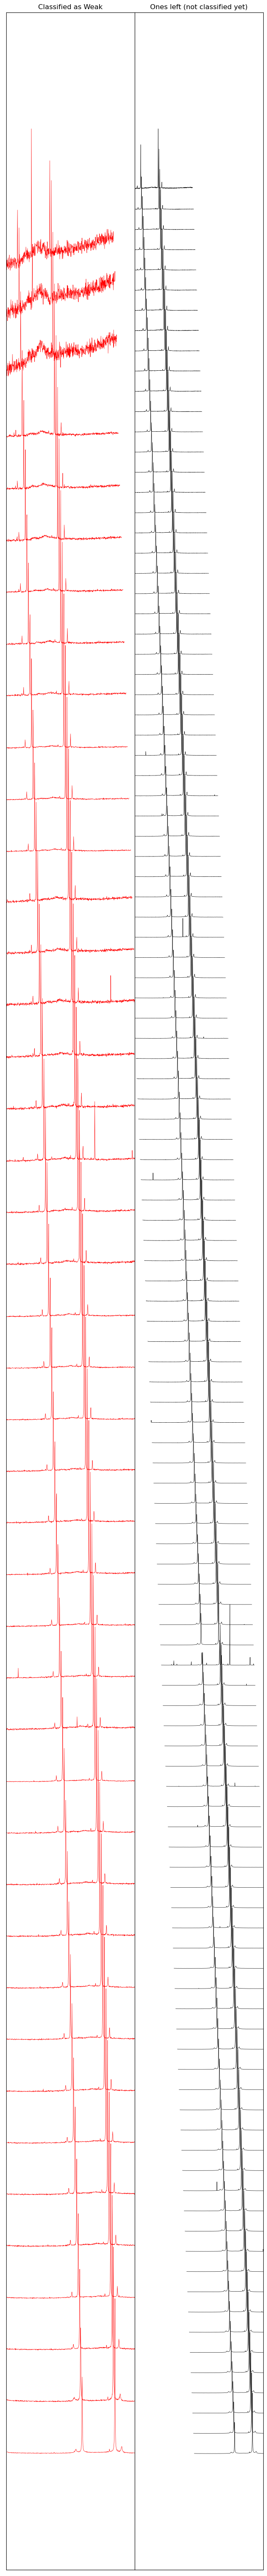

In [18]:
Filter1=(np.isnan(fit_params_filt['C13_pos']))
Filter2=(np.isnan(fit_params_filt['HB1_pos']))
Filter3=(np.isnan(fit_params_filt['HB2_pos']))
Filter4=~(fit_params_filt['Left_vs_Right'].between(0.95,1.2))
Filter5=~(fit_params_filt['C13_abs_prom']>30)


filter_bool=(Filter1)|(Filter2)|(Filter3)|Filter5


# Filter1=fit_params['Diad1_pos']>1286
# Filter2=~(fit_params['C13_abs_prom']>20)
# Filter3=fit_params['Diad1_prom/std_betweendiads']<700
# filter_bool=(Filter2)&Filter3

fit_params_Weak, fit_params_NotWeak, data_y_Weak, data_y_NotWeak=pf.identify_diad_group(
    fit_params=fit_params_filt, 
     data_y=data_y_filt, 
    x_cord=Diad[:, 0], 
    y_fig_scale=0.5,
    filter_bool=filter_bool, grp_filter='Weak')

In [19]:
fit_params_Weak

filename rays_present  approx_split    Diad1_pos  \
0               103 FDCA-P25-1.txt        False    104.608205  1282.400539   
1               105 FDCA-P26-1.txt        False    104.575207  1282.455535   
2               187 FDCA-P59-1.txt        False    103.557778  1284.638883   
3               199 FDCA-P62-3.txt        False    103.480783  1284.908364   
4   201 FDCA-P63-1_CRR_DiadFit.txt         True    103.442286  1285.001858   
5               202 FDCA-P63-2.txt        False    103.442286  1285.007357   
6               203 FDCA-P63-3.txt        False    103.453285  1285.001858   
7   205 FDCA-P64-1_CRR_DiadFit.txt         True    103.431287  1285.056854   
8               206 FDCA-P64-2.txt        False    103.436786  1285.062353   
9   207 FDCA-P64-3_CRR_DiadFit.txt         True    103.442286  1285.056854   
10              209 FDCA-P65-1.txt        False    103.425787  1285.106350   
11              210 FDCA-P65-2.txt        False    103.425787  1285.106350   
12              211 FDCA-P65-3.txt        False    103.414788  1285.117350   
13              215 FDCA-P66-3.txt        False    103.376291  1285.183345   
14  217 FDCA-P67-1_CRR_DiadFit.txt         True    103.310295  1285.282338   
15              218 FDCA-P67-2.txt        False    103.326794  1285.260340   
16              219 FDCA-P67-3.txt        False    103.332294  1285.260340   
17              221 FDCA-P68-1.txt        False    103.222301  1285.403330   
18              222 FDCA-P68-2.txt        False    103.211302  1285.408829   
19              223 FDCA-P68-3.txt        False    103.233300  1285.392330   
20              225 FDCA-P69-1.txt        False    103.161805  1285.507822   
21              226 FDCA-P69-2.txt        False    103.150806  1285.513322   
22  227 FDCA-P69-3_CRR_DiadFit.txt         True    103.156306  1285.513322   
23              229 FDCA-P70-1.txt        False    103.145307  1285.584817   
24              230 FDCA-P70-2.txt        False    103.145307  1285.590317   
25  231 FDCA-P70-3_CRR_DiadFit.txt         True    103.156306  1285.579317   
26  233 FDCA-P71-1_CRR_DiadFit.txt         True    103.156306  1285.639813   
27              234 FDCA-P71-2.txt        False    103.194803  1285.639813   
28  237 FDCA-P72-1_CRR_DiadFit.txt         True    103.244300  1285.694809   
29              238 FDCA-P72-2.txt        False    103.244300  1285.689310   
30              239 FDCA-P72-3.txt        False    103.244300  1285.689310   
31  241 FDCA-P73-1_CRR_DiadFit.txt         True    103.200303  1285.793802   
32  242 FDCA-P73-2_CRR_DiadFit.txt         True    103.211302  1285.788303   
33              243 FDCA-P73-3.txt        False    103.216802  1285.782803   
34              245 FDCA-P74-1.txt        False    103.090310  1285.953291   
35              246 FDCA-P74-2.txt        False    103.106809  1285.936792   
36              247 FDCA-P74-3.txt        False    103.090310  1285.953291   
37              249 FDCA-P75-1.txt        False    102.991317  1286.079782   
38              250 FDCA-P75-2.txt        False    102.991317  1286.079782   
39              251 FDCA-P75-3.txt        False    102.996817  1286.074283   
40  253 FDCA-P76-1_CRR_DiadFit.txt         True    102.996817  1286.101781   
41  254 FDCA-P76-2_CRR_DiadFit.txt         True    102.969319  1286.134779   
42  255 FDCA-P76-3_CRR_DiadFit.txt         True    102.985818  1286.101781   

      Diad2_pos      HB1_pos      HB2_pos      C13_pos  Diad1_abs_prom  \
0   1387.008744  1262.667915  1408.468247  1369.415471      748.547392   
1   1387.030742  1262.365436  1408.721229  1369.420970      365.139152   
2   1388.196661  1264.713772  1409.722160  1370.014929      580.335481   
3   1388.389147  1264.790767  1409.738658  1370.064425      945.770935   
4   1388.444143  1264.955756  1409.821153  1370.124921      978.297769   
5   1388.449643  1264.697274  1409.738658  1369.976431      748.968398   
6   1388.455143  1264.713772  1409.760657  1370.124921      825.793174   
7

## Seperate Medium and strong diads
- Now we need to find something that separates out strong diads from medium strength diads
- The aim here is to get diads that are sufficiently strong that you have to fit a gaussian background in addition to diads, hbs and C13 peaks. Not having to fit a gaussian background to medium density diads will save you a lot of computational time (and decrease the number of bad fits)
- In many datasets, you wont need a strong diad category. In which case, everything will stay in the 'Medium' Category
- Here, the best filter appears to be the prominence of the C13 peak, and the general elevation of the valley between diad and HB above the background outside the diad positions (Mean_Diad_HB variable). 

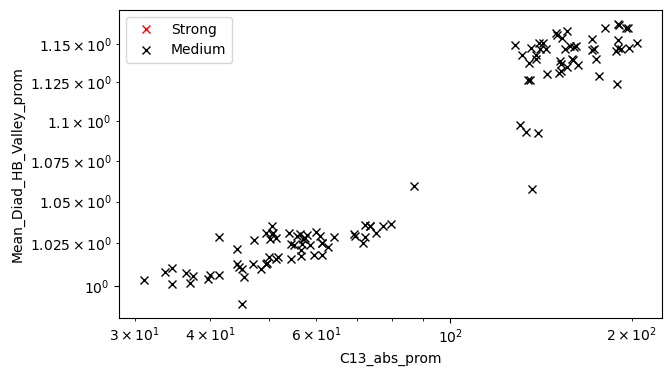

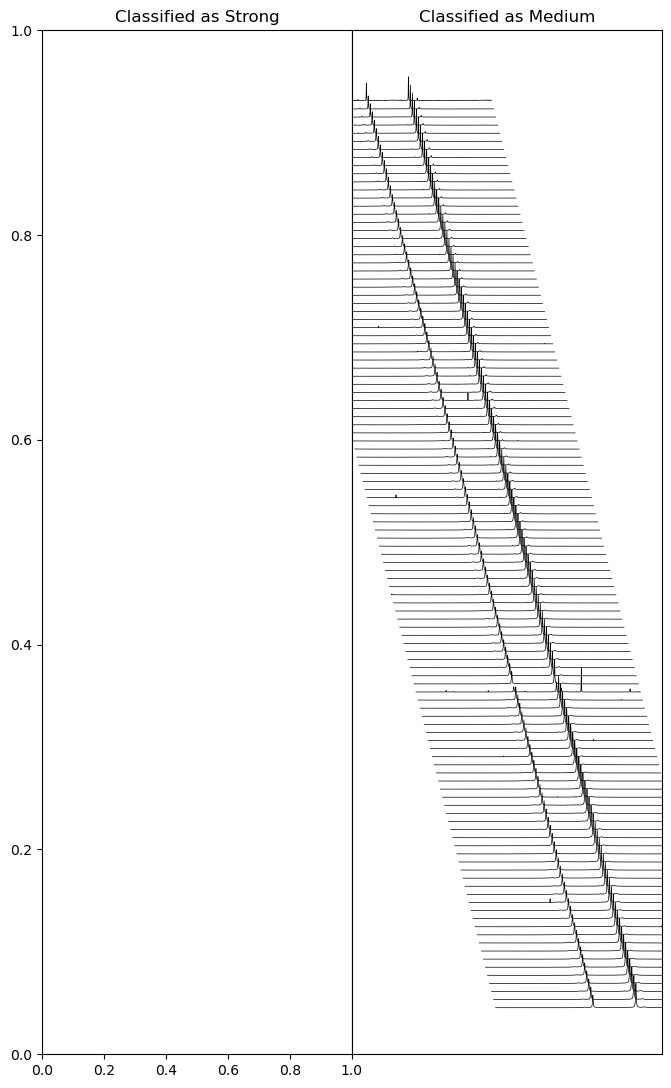

In [20]:
var1='C13_abs_prom'
var2='Mean_Diad_HB_Valley_prom'
filter_bool_Strong=((fit_params_NotWeak[var1]>100)
                    &(fit_params_NotWeak[var2]>100))
# Here we make a plot of these parameters to better help select the right values
fig, (ax1) = plt.subplots(1, 1, figsize=(7,4))
ax1.plot(fit_params_NotWeak[var1].loc[filter_bool_Strong],
         fit_params_NotWeak[var2].loc[filter_bool_Strong], 'xr', label='Strong')
ax1.plot(fit_params_NotWeak[var1].loc[~filter_bool_Strong],
         fit_params_NotWeak[var2].loc[~filter_bool_Strong], 'xk', label='Medium')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(var1)
ax1.set_ylabel(var2)
ax1.legend()
#This makes a plot
fit_params_Strong, fit_params_Medium, data_y_Strong, data_y_Medium=pf.identify_diad_group(
    fit_params=fit_params_NotWeak.reset_index(drop=True), 
    data_y=data_y_NotWeak,x_cord=Diad[:, 0], 
    filter_bool=filter_bool_Strong, y_fig_scale=0.1, grp_filter='Medium-Strong')

## Plot them all 

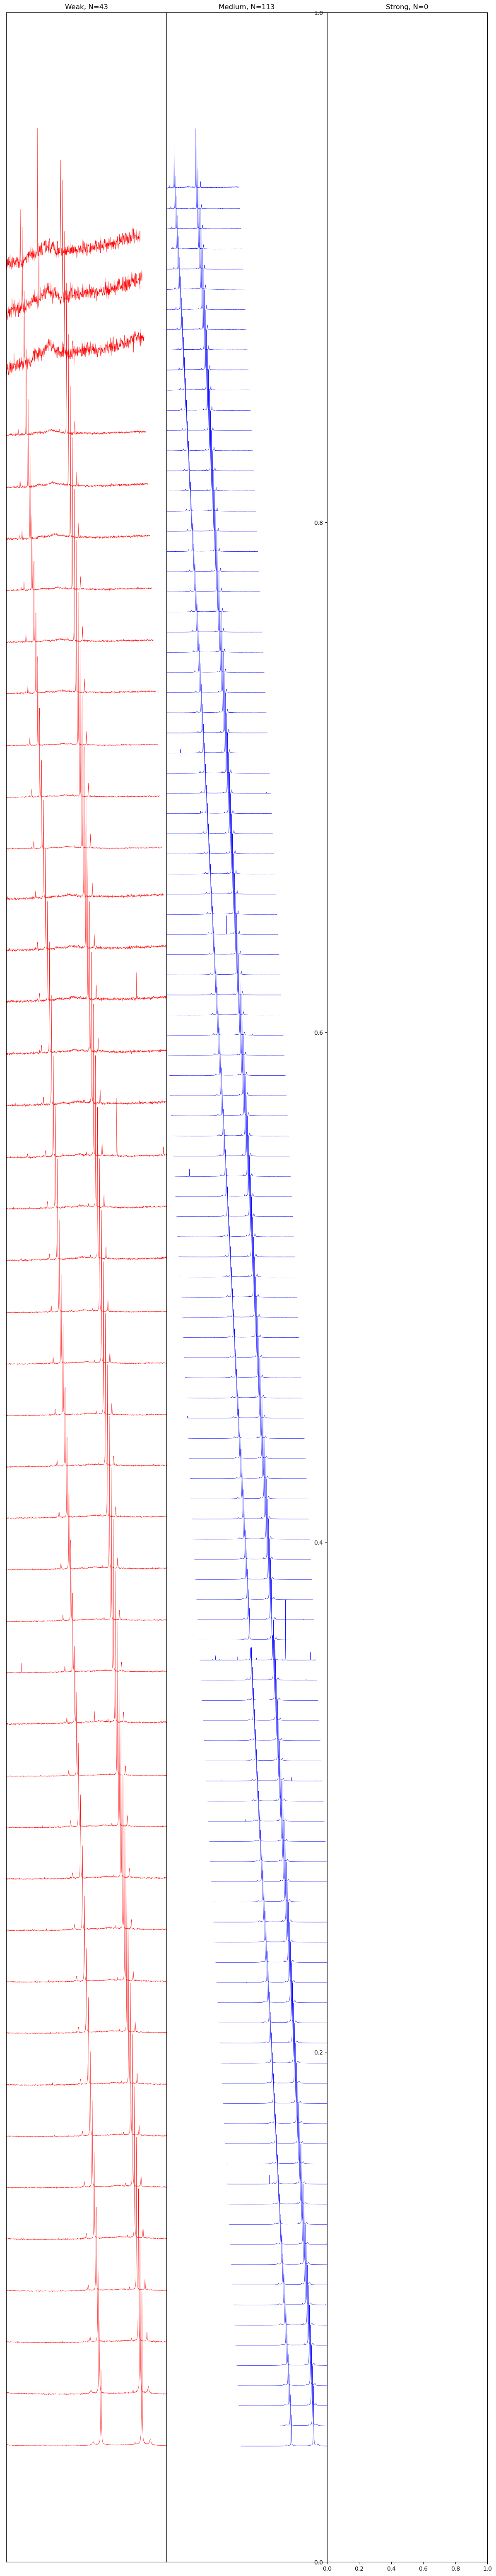

In [21]:
fig=pf.plot_diad_groups(x_cord=Diad[:, 0], Weak_np=data_y_Weak,
                 Medium_np=data_y_Medium, Strong_np=data_y_Strong,
                   y_fig_scale=0.5)

## Now lets save these lists, and we load them in another notebook

In [22]:
import joblib
joblib.dump(Diad[:, 0], 'np_x.sav')
joblib.dump(Diad[:, 1], 'np_y.sav')
joblib.dump(fit_params_Weak.reset_index(drop=True), 'Weak_df.sav')
joblib.dump(fit_params_Medium.reset_index(drop=True), 'Medium_df.sav')
joblib.dump(fit_params_Strong.reset_index(drop=True), 'Strong_df.sav')
fit_params_disc.to_excel('Discarded_df.xlsx')


In [23]:
from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step2_Filtering_Numerical is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()